### USBL DATA PROCESSING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(25,25)})
sns.set_context("paper")

In [2]:
# This notebook reads csv info extracted from bagfile topics
# To obtain the csvs desired files use usbldata_csv_extractor.py script execute by doing: 
# python usbldata_csv_extractor.py path_to_the_bagfile

# Once the csvs are extracted save them following this structure:
# Desired path + turbot + 
                           #  modem_delayed":"modem_delayed.csv
                           #  modem_raw":"modem_raw.csv
                           #  USBLlon":"USBLlon.csv
                           #  nav_status_turbot":"nav_status_tu.csv
                
# Desired path + xiroi + nav_status_xi.csv           



#Path to folder containing the robot files that contain the csvs
#Change this path and reexecute the notebook to obtain the results from a different bagfile:
path ='/home/eric/lib/postprocessing_cat/csvs/grassmap/17_09/'

In [3]:
robots=["turbot","xiroi"]

csv_files={"modem_delayed":"modem_delayed.csv",
           "modem_raw":"modem_raw.csv",
           "USBLlon":"USBLlon.csv",
           "nav_status_turbot":"nav_status_tu.csv",
           "nav_status_xiroi":"nav_status_xi.csv"}

#Creates dataframe, sets timestamp as index and resamples to 0.1S (averages data for each 0.1s so that there is only 10 measures for second)
#Resampling allows joining diferent dataframes from different topics
def create_df(csv_file,robot):
    df=pd.read_csv(path+robot+"/"+csv_files[csv_file],header=0,index_col=0)
    original_df=df.copy(deep=False)
    
    df=df.rename(columns={df.columns[0]:"stamp"})
    df['stamp'] = pd.to_datetime(df["stamp"], unit='ns')
    df = df.set_index('stamp')
    df=df.resample('0.1S').mean()
    return original_df,df
    

In [4]:
#Create topic dataframes:

robot="turbot"
#turbot_navigation:
turbot_nav_status_0,turbot_nav_status=create_df("nav_status_turbot",robot)
display(turbot_nav_status.head())
display(turbot_nav_status.describe())
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")
#USBLlon:
USBLlon_0,USBLlon=create_df("USBLlon",robot)
display(USBLlon.head())
display(USBLlon.describe())
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
#USBLlon:
modem_delayed_0,modem_delayed=create_df("modem_delayed",robot)
display(modem_delayed.head())
display(modem_delayed.describe())

print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
#modem_raw:
modem_raw_0,modem_raw=create_df("modem_raw",robot)
display(modem_raw.head())
display(modem_raw.describe())

print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
robot="xiroi"
#xiroi_navigation:
xiroi_nav_status_0,xiroi_nav_status=create_df("nav_status_xiroi",robot)
display(xiroi_nav_status.head())
display(xiroi_nav_status.describe())

print("---------------------------------------------------------------------------------------------------------------------------------------------------------")
#USBLlon:
USBLlon_0_x,USBLlon_x=create_df("USBLlon",robot)
display(USBLlon_0_x.head())
USBLlon_0_x.describe()

nav_status_D  nav_status_E  nav_status_N  \
stamp                                                               
2021-09-17 09:28:48.900      0.036484    -43.774922   -113.372055   
2021-09-17 09:28:49.000      0.032740    -43.776133   -113.370120   
2021-09-17 09:28:49.100      0.036125    -43.791321   -113.360272   
2021-09-17 09:28:49.200      0.047986    -43.797696   -113.354592   
2021-09-17 09:28:49.300      0.049064    -43.803297   -113.349475   

                         nav_status_alt  nav_status_origin_lat  \
stamp                                                            
2021-09-17 09:28:48.900       31.521029                39.1546   
2021-09-17 09:28:49.000       31.521029                39.1546   
2021-09-17 09:28:49.100       31.518281                39.1546   
2021-09-17 09:28:49.200       31.522900                39.1546   
2021-09-17 09:28:49.300       31.523590                39.1546   

                         nav_status_origin_lon  nav_status_pitch  \
stamp                                                              
2021-09-17 09:28:48.900                 2.9449          0.135136   
2021-09-17 09:28:49.000                 2.9449          0.129154   
2021-09-17 09:28:49.100                 2.9449          0.123275   
2021-09-17 09:28:49.200                 2.9449          0.119861   
2021-09-17 09:28:49.300                 2.9449          0.118268   

                         nav_status_roll  nav_status_yaw  
stamp                                                     
2021-09-17 09:28:48.900        -0.086541        2.557303  
2021-09-17 09:28:49.000        -0.084177        2.555136  
2021-09-17 09:28:49.100        -0.080620        2.551946  
2021-09-17 09:28:49.200        -0.076513        2.547883  
2021-09-17 09:28:49.300        -0.073541        2.545071

nav_status_D  nav_status_E  nav_status_N  nav_status_alt  \
count  35330.000000  35330.000000  35330.000000    35330.000000   
mean      25.441500    -46.915235   -114.421000        6.898747   
std        8.156224     11.352358     12.416210        7.972157   
min       -0.047277    -67.900814   -134.779737        3.198138   
25%       27.833144    -56.512165   -126.435243        3.498841   
50%       28.556437    -46.894767   -114.113745        3.548006   
75%       29.659785    -37.299312   -102.877023        3.619855   
max       29.871651    -26.786917    -94.303970       34.407823   

       nav_status_origin_lat  nav_status_origin_lon  nav_status_pitch  \
count             35330.0000           3.533000e+04      35330.000000   
mean                 39.1546           2.944900e+00          0.026727   
std                   0.0000           4.440955e-16          0.062364   
min                  39.1546           2.944900e+00         -0.127487   
25%                  39.1546           2.944900e+00         -0.020764   
50%                  39.1546           2.944900e+00          0.017828   
75%                  39.1546           2.944900e+00          0.053525   
max                  39.1546           2.944900e+00          0.325373   

       nav_status_roll  nav_status_yaw  
count     35330.000000    35330.000000  
mean         -0.067318        0.305734  
std           0.026243        1.738441  
min          -0.363118       -3.141510  
25%          -0.078934       -0.916408  
50%          -0.063793       -0.559673  
75%          -0.053390        2.533999  
max           0.104473        3.139935

---------------------------------------------------------------------------------------------------------------------------------------------------------


usbllong_D  usbllong_E  usbllong_N  usbllong_X  \
stamp                                                                     
2021-09-17 09:30:09.800     -6.7924    -25.4499   45.122299   37.892899   
2021-09-17 09:30:09.900         NaN         NaN         NaN         NaN   
2021-09-17 09:30:10.000         NaN         NaN         NaN         NaN   
2021-09-17 09:30:10.100         NaN         NaN         NaN         NaN   
2021-09-17 09:30:10.200         NaN         NaN         NaN         NaN   

                         usbllong_Y  usbllong_Z  usbllong_pitch  \
stamp                                                             
2021-09-17 09:30:09.800  -35.637402     -4.8949          0.0213   
2021-09-17 09:30:09.900         NaN         NaN             NaN   
2021-09-17 09:30:10.000         NaN         NaN             NaN   
2021-09-17 09:30:10.100         NaN         NaN             NaN   
2021-09-17 09:30:10.200         NaN         NaN             NaN   

                         usbllong_roll  usbllong_yaw  
stamp                                                 
2021-09-17 09:30:09.800         0.0307          0.24  
2021-09-17 09:30:09.900            NaN           NaN  
2021-09-17 09:30:10.000            NaN           NaN  
2021-09-17 09:30:10.100            NaN           NaN  
2021-09-17 09:30:10.200            NaN           NaN

usbllong_D   usbllong_E   usbllong_N   usbllong_X   usbllong_Y  \
count  2501.000000  2501.000000  2501.000000  2501.000000  2501.000000   
mean     24.477756   -32.309584    26.181361    32.401462   -24.241587   
std       7.549443    23.181807    26.122760    20.216829    29.084146   
min     -52.687801   -61.128399   -39.726799   -23.344999   -68.857201   
25%      24.457701   -47.490101     6.941700    20.927500   -41.115799   
50%      26.307199   -37.306099    31.786600    36.833000   -32.199200   
75%      28.617300   -27.439600    45.812801    48.069099   -17.308201   
max      31.949100    58.771301    80.383797    78.126503    72.903198   

        usbllong_Z  usbllong_pitch  usbllong_roll  usbllong_yaw  
count  2501.000000     2501.000000    2501.000000   2501.000000  
mean     25.580006        0.027119       0.011524     -0.297799  
std       7.673514        0.024235       0.024747      0.515220  
min     -52.572102       -0.061100      -0.068600     -1.896300  
25%      25.142700        0.010600      -0.005400     -0.601300  
50%      27.663601        0.026900       0.011300     -0.277900  
75%      29.649900        0.042900       0.028300     -0.006800  
max      35.245300        0.103500       0.094800      1.857200

----------------------------------------------------------------------------------------------------------------------------------------------------------


modem_delayed_X  modem_delayed_Y  modem_delayed_Z  \
stamp                                                                        
2021-09-17 09:30:09.800      -129.226977        -31.34882          -5.9924   
2021-09-17 09:30:09.900              NaN              NaN              NaN   
2021-09-17 09:30:10.000              NaN              NaN              NaN   
2021-09-17 09:30:10.100              NaN              NaN              NaN   
2021-09-17 09:30:10.200              NaN              NaN              NaN   

                         modem_delayed_ori_W  modem_delayed_ori_X  \
stamp                                                               
2021-09-17 09:30:09.800             0.486542                  0.0   
2021-09-17 09:30:09.900                  NaN                  NaN   
2021-09-17 09:30:10.000                  NaN                  NaN   
2021-09-17 09:30:10.100                  NaN                  NaN   
2021-09-17 09:30:10.200                  NaN                  NaN   

                         modem_delayed_ori_Y  modem_delayed_ori_Z  
stamp                                                              
2021-09-17 09:30:09.800                  0.0             0.873657  
2021-09-17 09:30:09.900                  NaN                  NaN  
2021-09-17 09:30:10.000                  NaN                  NaN  
2021-09-17 09:30:10.100                  NaN                  NaN  
2021-09-17 09:30:10.200                  NaN                  NaN

modem_delayed_X  modem_delayed_Y  modem_delayed_Z  modem_delayed_ori_W  \
count      2501.000000      2501.000000      2501.000000          2501.000000   
mean       -119.942266       -47.866680        25.277756             0.627587   
std          16.786685        12.512564         7.549443             0.127746   
min        -168.137405       -87.509707       -51.887801             0.200321   
25%        -133.265562       -55.687384        25.257701             0.560471   
50%        -120.211772       -47.345931        27.107199             0.615239   
75%        -103.988126       -39.301691        29.417300             0.672257   
max         -86.140422       -23.182549        32.749100             0.964269   

       modem_delayed_ori_X  modem_delayed_ori_Y  modem_delayed_ori_Z  
count               2501.0               2501.0          2501.000000  
mean                   0.0                  0.0             0.757464  
std                    0.0                  0.0             0.126790  
min                    0.0                  0.0             0.264923  
25%                    0.0                  0.0             0.740318  
50%                    0.0                  0.0             0.788341  
75%                    0.0                  0.0             0.828174  
max                    0.0                  0.0             0.979730

----------------------------------------------------------------------------------------------------------------------------------------------------------


modem_raw_X  modem_raw_Y  modem_raw_Z  \
stamp                                                            
2021-09-17 09:30:15.100  -124.736136   -31.958331      -6.5851   
2021-09-17 09:30:15.200          NaN          NaN          NaN   
2021-09-17 09:30:15.300          NaN          NaN          NaN   
2021-09-17 09:30:15.400          NaN          NaN          NaN   
2021-09-17 09:30:15.500          NaN          NaN          NaN   

                         modem_raw_ori_W  modem_raw_ori_X  modem_raw_ori_Y  \
stamp                                                                        
2021-09-17 09:30:15.100         0.932558         0.011009        -0.057893   
2021-09-17 09:30:15.200              NaN              NaN              NaN   
2021-09-17 09:30:15.300              NaN              NaN              NaN   
2021-09-17 09:30:15.400              NaN              NaN              NaN   
2021-09-17 09:30:15.500              NaN              NaN              NaN   

                         modem_raw_ori_Z  
stamp                                     
2021-09-17 09:30:15.100         0.356179  
2021-09-17 09:30:15.200              NaN  
2021-09-17 09:30:15.300              NaN  
2021-09-17 09:30:15.400              NaN  
2021-09-17 09:30:15.500              NaN

modem_raw_X  modem_raw_Y  modem_raw_Z  modem_raw_ori_W  \
count  2298.000000  2298.000000  2298.000000      2298.000000   
mean   -120.139734   -47.965724    25.345187         0.665477   
std      16.828993    12.711492     7.131042         0.309363   
min    -168.137405   -77.578844   -20.805499        -0.001234   
25%    -133.448827   -56.383547    25.238076         0.288211   
50%    -121.763377   -47.220574    27.055651         0.827108   
75%    -103.873734   -39.138367    29.410726         0.943412   
max     -86.140422   -23.222970    32.749100         0.999680   

       modem_raw_ori_X  modem_raw_ori_Y  modem_raw_ori_Z  
count      2298.000000      2298.000000      2298.000000  
mean         -0.021774         0.005824         0.067188  
std           0.020085         0.037141         0.674440  
min          -0.106436        -0.076985        -0.999661  
25%          -0.033590        -0.023587        -0.441313  
50%          -0.023317        -0.005289        -0.279783  
75%          -0.011439         0.024851         0.953605  
max           0.096181         0.161856         0.999545

----------------------------------------------------------------------------------------------------------------------------------------------------------


nav_status_D  nav_status_E  nav_status_N  \
stamp                                                               
2021-09-17 09:28:49.800           0.0    -82.695588   -139.772221   
2021-09-17 09:28:49.900           0.0    -82.707011   -139.770820   
2021-09-17 09:28:50.000           0.0    -82.715005   -139.771059   
2021-09-17 09:28:50.100           0.0    -82.723076   -139.767133   
2021-09-17 09:28:50.200           0.0    -82.729740   -139.765125   

                         nav_status_alt  nav_status_origin_lat  \
stamp                                                            
2021-09-17 09:28:49.800             0.0                39.1546   
2021-09-17 09:28:49.900             0.0                39.1546   
2021-09-17 09:28:50.000             0.0                39.1546   
2021-09-17 09:28:50.100             0.0                39.1546   
2021-09-17 09:28:50.200             0.0                39.1546   

                         nav_status_origin_lon  nav_status_pitch  \
stamp                                                              
2021-09-17 09:28:49.800                 2.9449               0.0   
2021-09-17 09:28:49.900                 2.9449               0.0   
2021-09-17 09:28:50.000                 2.9449               0.0   
2021-09-17 09:28:50.100                 2.9449               0.0   
2021-09-17 09:28:50.200                 2.9449               0.0   

                         nav_status_roll  nav_status_yaw  
stamp                                                     
2021-09-17 09:28:49.800              0.0        1.769144  
2021-09-17 09:28:49.900              0.0        1.767713  
2021-09-17 09:28:50.000              0.0        1.794109  
2021-09-17 09:28:50.100              0.0        1.811794  
2021-09-17 09:28:50.200              0.0        1.809121

nav_status_D  nav_status_E  nav_status_N  nav_status_alt  \
count       13609.0  13609.000000  13609.000000         13609.0   
mean            0.0    -91.307207   -135.807538             0.0   
std             0.0     13.644245      6.023718             0.0   
min             0.0   -128.673608   -140.989250             0.0   
25%             0.0    -96.431104   -139.743094             0.0   
50%             0.0    -82.939895   -139.543482             0.0   
75%             0.0    -82.729587   -133.048224             0.0   
max             0.0    -81.990085   -118.875055             0.0   

       nav_status_origin_lat  nav_status_origin_lon  nav_status_pitch  \
count             13609.0000           1.360900e+04           13609.0   
mean                 39.1546           2.944900e+00               0.0   
std                   0.0000           8.882111e-16               0.0   
min                  39.1546           2.944900e+00               0.0   
25%                  39.1546           2.944900e+00               0.0   
50%                  39.1546           2.944900e+00               0.0   
75%                  39.1546           2.944900e+00               0.0   
max                  39.1546           2.944900e+00               0.0   

       nav_status_roll  nav_status_yaw  
count          13609.0    13609.000000  
mean               0.0        1.488791  
std                0.0        0.393230  
min                0.0        0.498247  
25%                0.0        1.206251  
50%                0.0        1.592700  
75%                0.0        1.795510  
max                0.0        2.196186

---------------------------------------------------------------------------------------------------------------------------------------------------------


a_USBLlong_t  usbllong_N  usbllong_X  usbllong_Y  usbllong_Z  \
0  2021-09-17 09:30:09.881725   45.122299   37.892899  -35.637402     -4.8949   
1  2021-09-17 09:30:10.925338   44.943100   33.128399  -40.430000     -5.1815   
2  2021-09-17 09:30:15.179183   44.253799   36.012901  -38.148701     -7.0273   
3  2021-09-17 09:30:16.210662   44.620098   37.517101  -36.870998     -5.7762   
4  2021-09-17 09:30:23.923074   43.423901   41.201099  -33.345402     -3.3102   

   usbllong_pitch  usbllong_roll  usbllong_yaw  
0          0.0213         0.0307        0.2400  
1          0.0106         0.0089        0.3512  
2          0.0325        -0.0211        0.2543  
3          0.0307         0.0183        0.2265  
4          0.0620        -0.0571        0.0784

usbllong_N  usbllong_X  usbllong_Y  usbllong_Z  usbllong_pitch  \
count  903.000000  903.000000  903.000000  903.000000      903.000000   
mean    45.123184   44.485022   -3.976000   23.345585        0.025289   
std     13.823467   14.505308   35.095866    8.608013        0.025162   
min      5.118200   -0.430300  -55.345200  -52.572102       -0.061100   
25%     38.687700   38.244251  -27.688299   22.989699        0.008650   
50%     45.113800   48.281200  -16.931700   26.007601        0.024300   
75%     51.921900   54.011801   15.207300   28.218800        0.042500   
max     80.383797   78.126503   72.903198   33.890202        0.098100   

       usbllong_roll  usbllong_yaw  
count     903.000000    903.000000  
mean        0.011353     -0.364614  
std         0.028118      0.444729  
min        -0.068600     -1.400800  
25%        -0.008400     -0.680500  
50%         0.011700     -0.264400  
75%         0.030000     -0.006150  
max         0.094800      0.351200

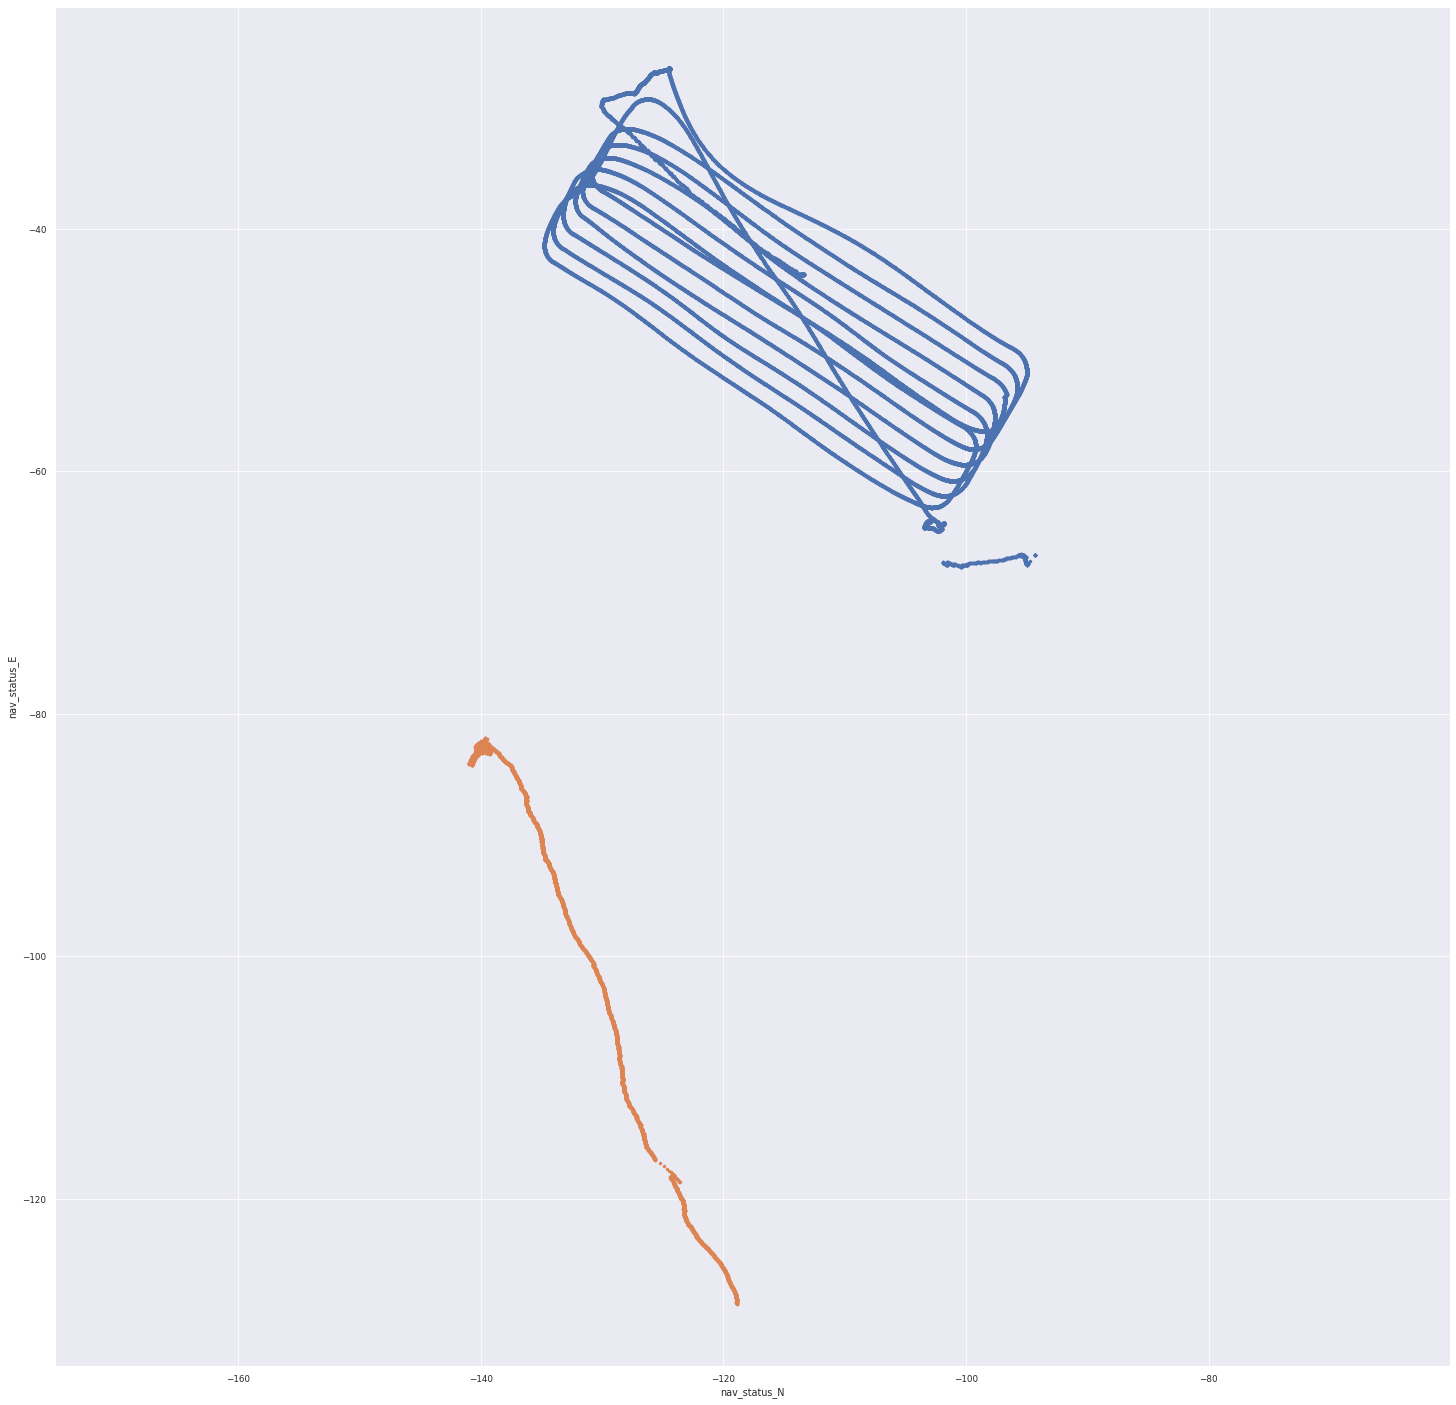

In [5]:
# Plot localization of turbot and xiroi
fig, ax = plt.subplots()
sns.scatterplot(data=turbot_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=xiroi_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
plt.axis('equal')
plt.show()

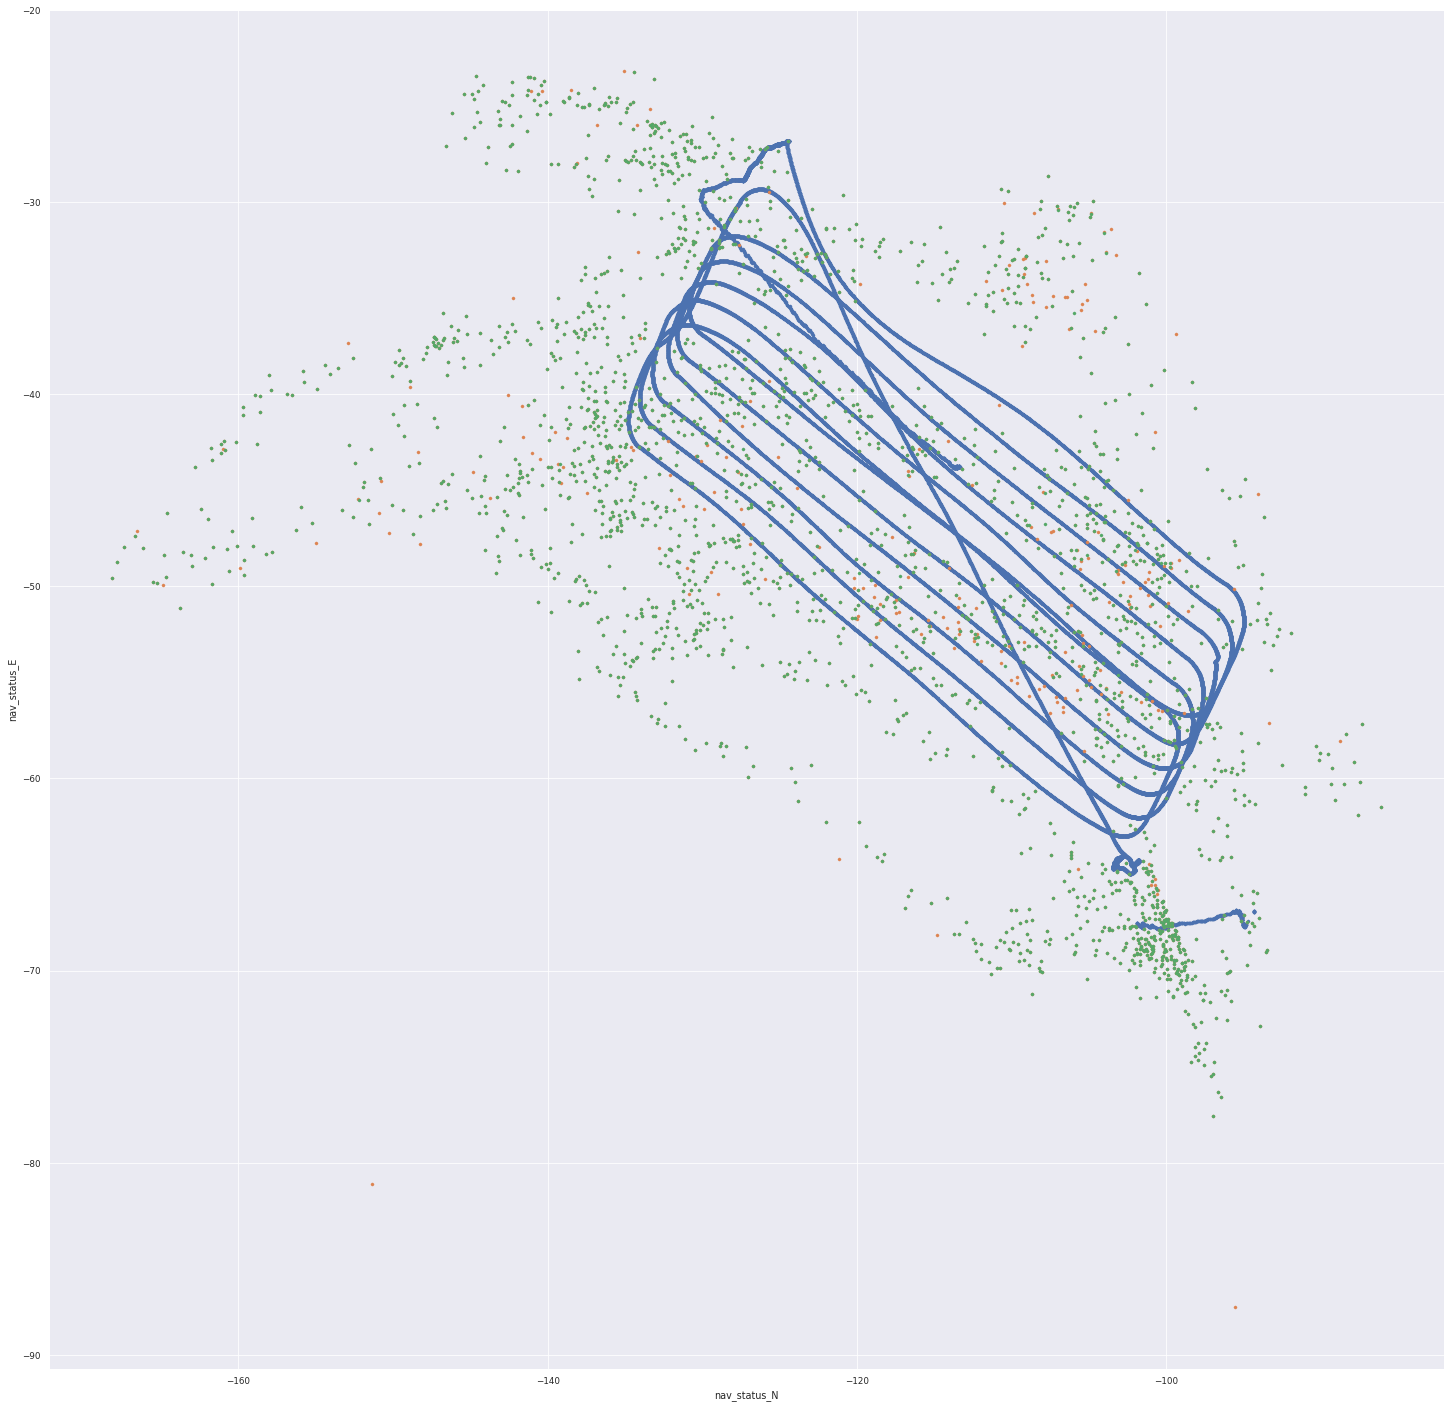

In [6]:
# Plot localization + modem_delayed and modem_raw
fig, ax = plt.subplots()
sns.scatterplot(data=turbot_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

sns.scatterplot(data=modem_delayed,x="modem_delayed_X", y="modem_delayed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=modem_raw,x="modem_raw_X", y="modem_raw_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
#plt.axis('equal')
plt.show()

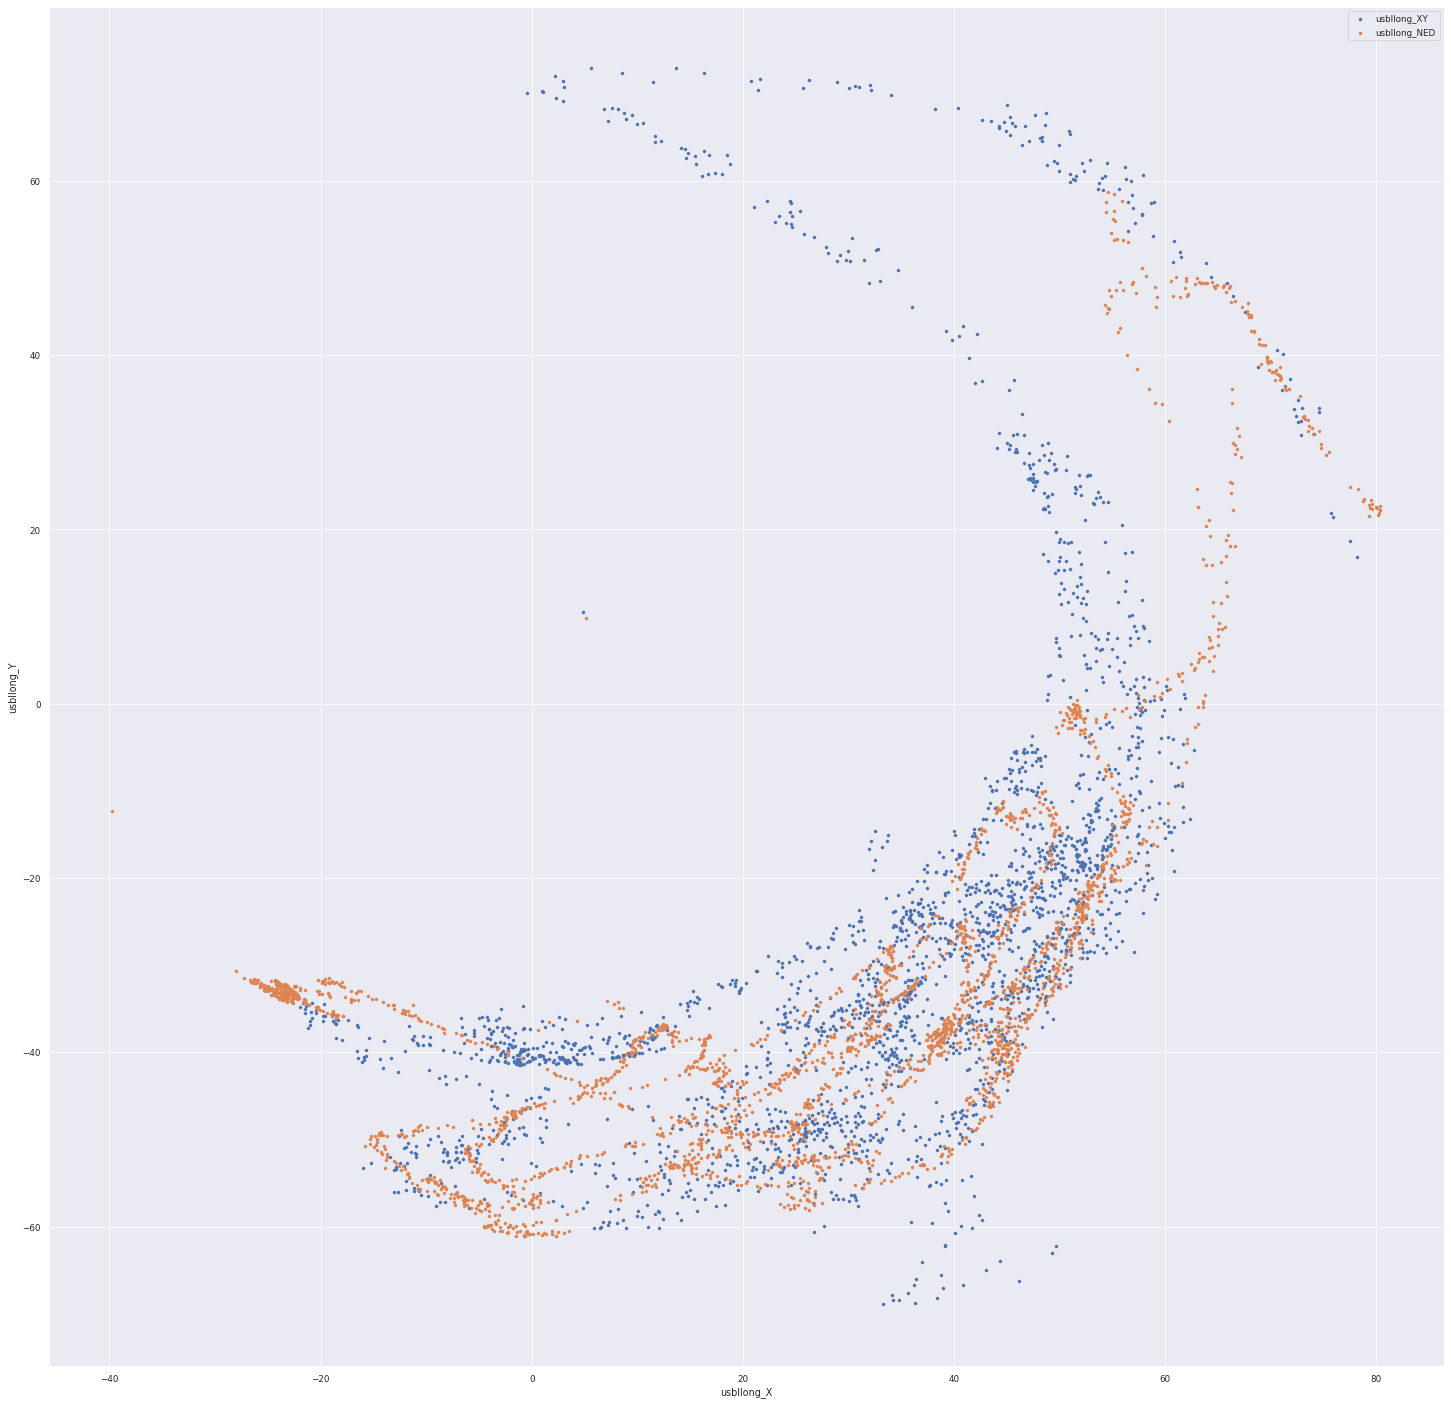

In [7]:
# Plot USBLlon XY and USBLlon NED(this one should be rotated in world directions according to USBL IMU) 
# Weird similarity?

fig, ax = plt.subplots()

sns.scatterplot(data=USBLlon,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=USBLlon,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
plt.legend(["usbllong_XY","usbllong_NED"])
#plt.axis('equal')
plt.show()

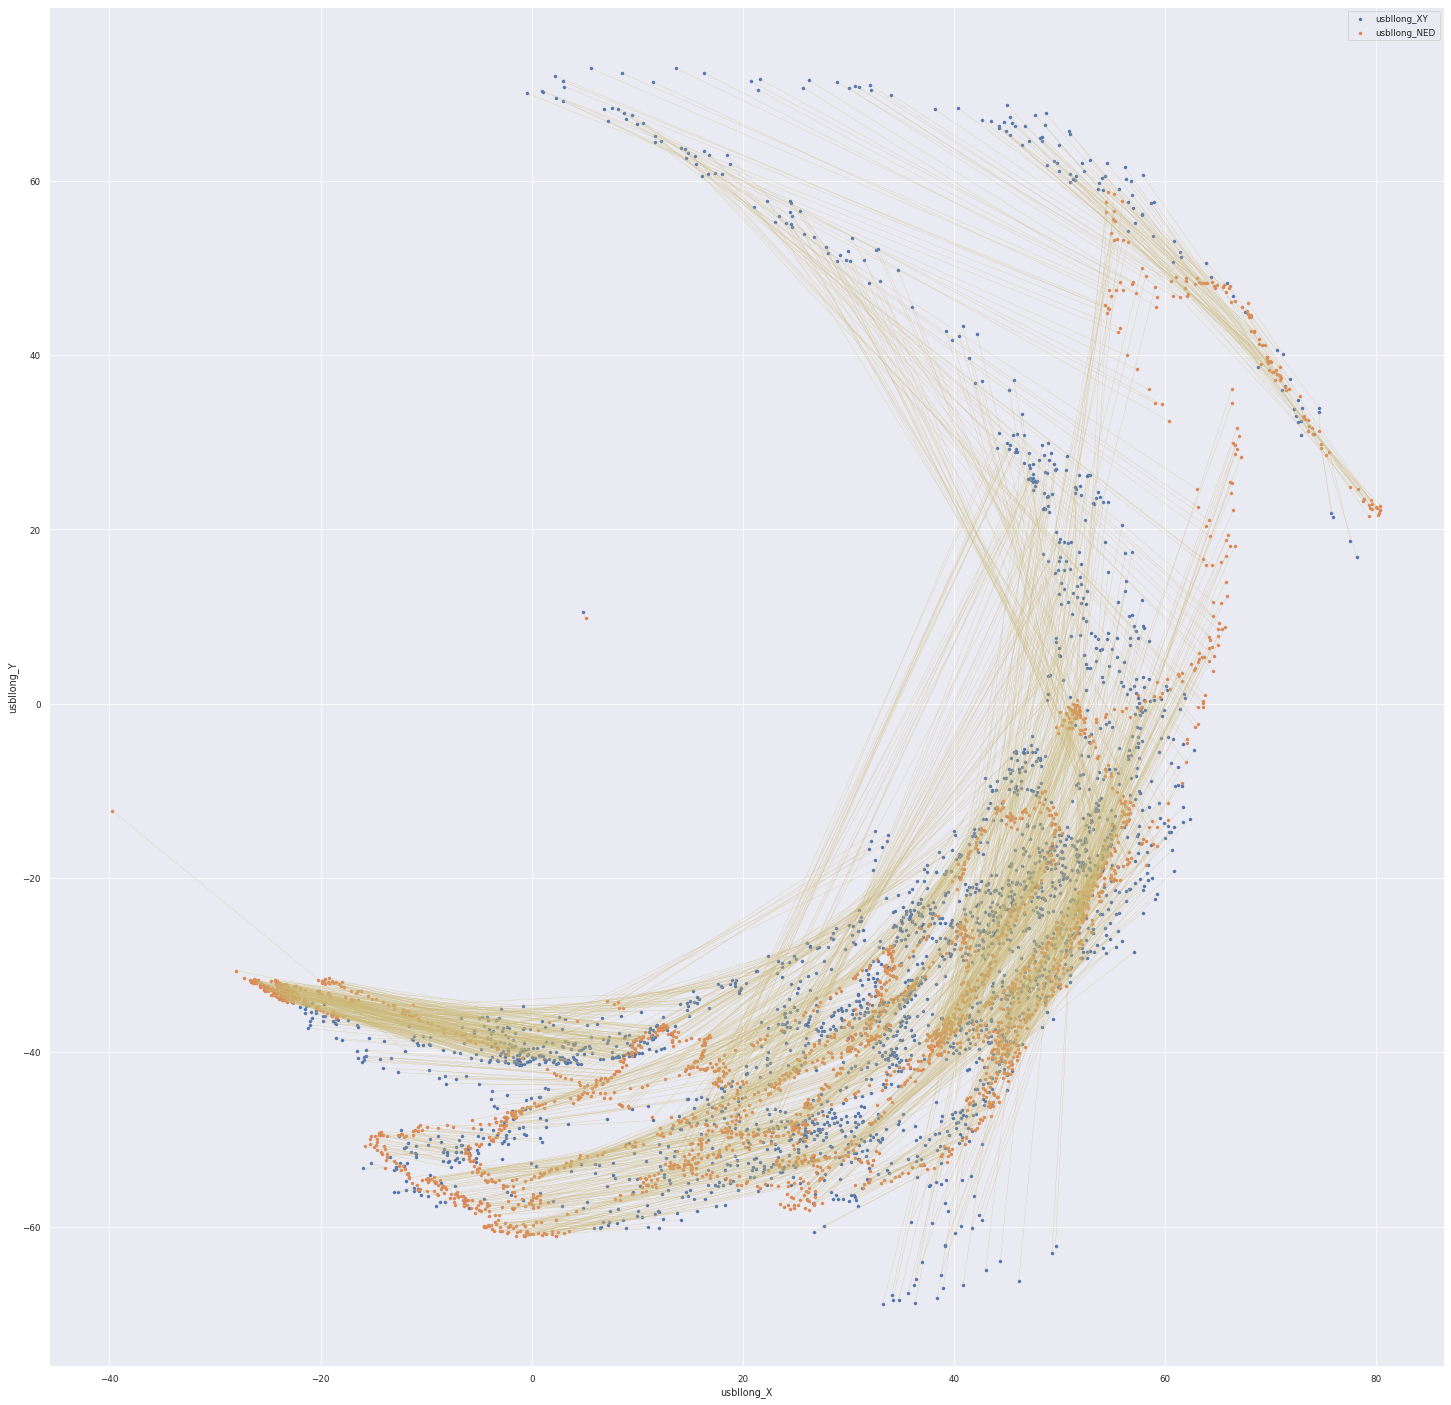

In [8]:
# Plot correlations for USBL XY and USBL NED
fig, ax = plt.subplots()

sns.scatterplot(data=USBLlon,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=USBLlon,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

plt.legend(["usbllong_XY","usbllong_NED"])


for index, row in USBLlon.iterrows():
    plt.plot([row.usbllong_X, row.usbllong_N], [row.usbllong_Y, row.usbllong_E], linewidth=0.2, c='y')
    # mse = np.sqrt(np.power(row.Em - row.east_turbot,2)+np.power(row.Nm - row.north_turbot,2))
    
#plt.axis('equal')
plt.show()

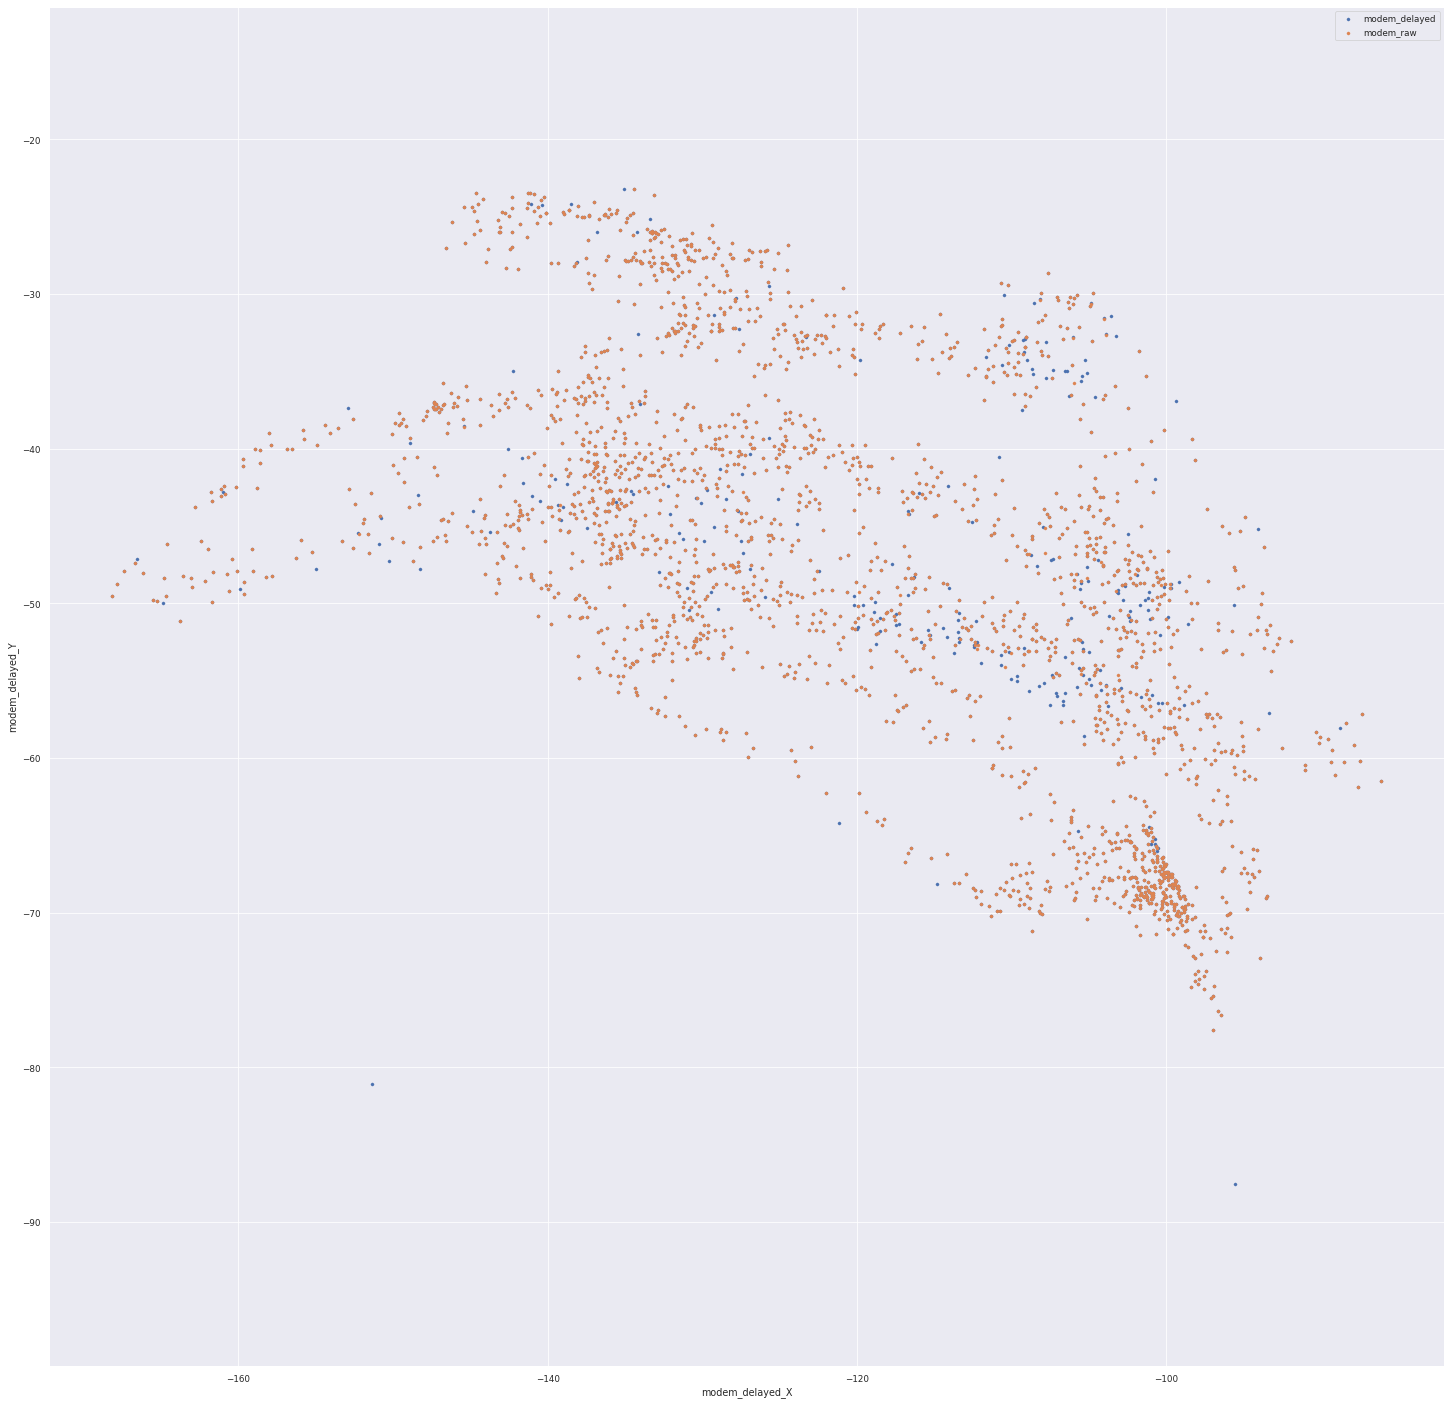

In [9]:
# Plot modem raw and modem delayed
fig, ax = plt.subplots()
sns.scatterplot(data=modem_delayed,x="modem_delayed_X", y="modem_delayed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=modem_raw,x="modem_raw_X", y="modem_raw_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
plt.legend(["modem_delayed","modem_raw"])

plt.axis('equal')
plt.show()

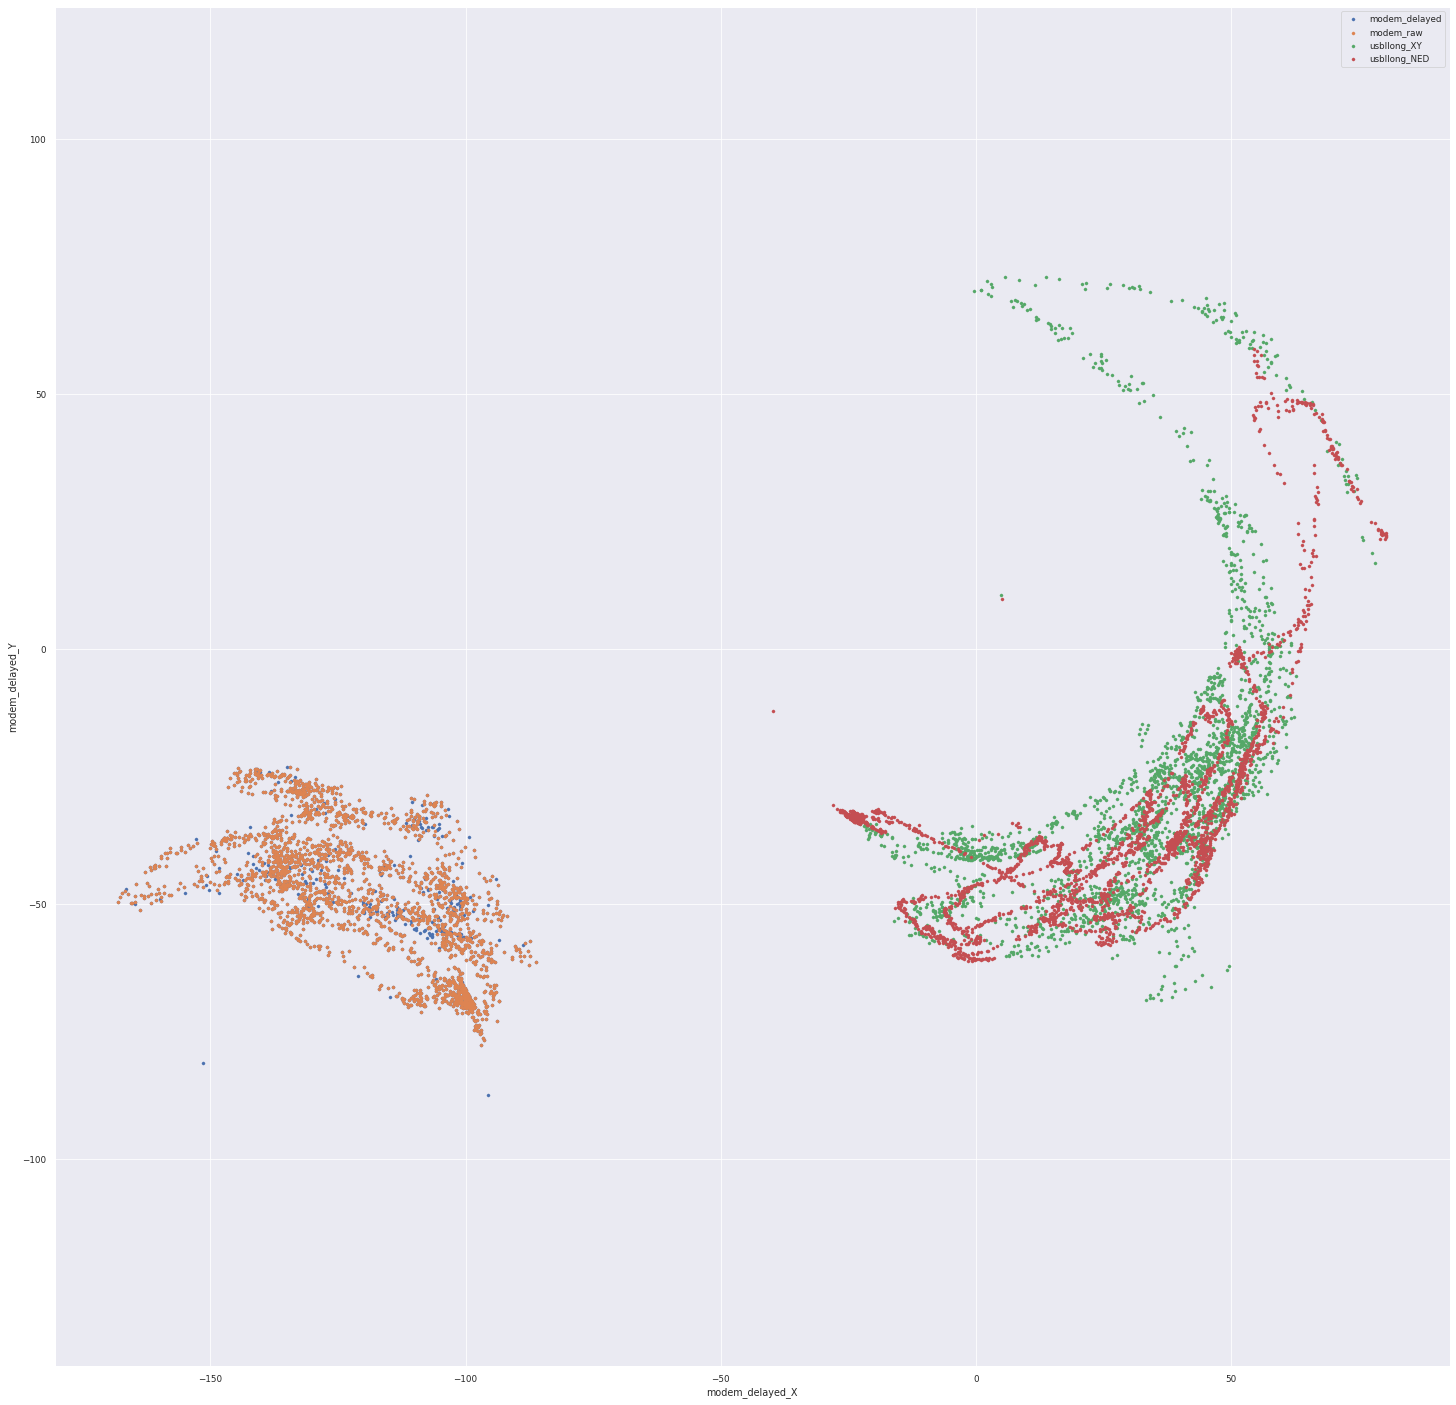

In [10]:
# Plot modem delayed modem raw and USBLlons
fig, ax = plt.subplots()

#sns.scatterplot(data=turbot_nav_status,x="nav_status_E", y="nav_status_N", hue=None, style=None, edgecolor=None, s=10, ax=ax)
#sns.scatterplot(data=xiroi_nav_status,x="nav_status_E", y="nav_status_N", hue=None, style=None, edgecolor=None, s=10, ax=ax)

sns.scatterplot(data=modem_delayed,x="modem_delayed_X", y="modem_delayed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=modem_raw,x="modem_raw_X", y="modem_raw_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)

sns.scatterplot(data=USBLlon,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=USBLlon,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

#sns.scatterplot(data=USBLlon_x,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
#sns.scatterplot(data=USBLlon_x,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
plt.legend(["modem_delayed","modem_raw","usbllong_XY","usbllong_NED","usbllong_XY_x","usbllong_NED_x"])
#plt.legend(["turbot","xiroi","modem_delayed","modem_raw","usbllong_XY","usbllong_NED","usbllong_XY_x","usbllong_NED_x"])

plt.axis('equal')
plt.show()

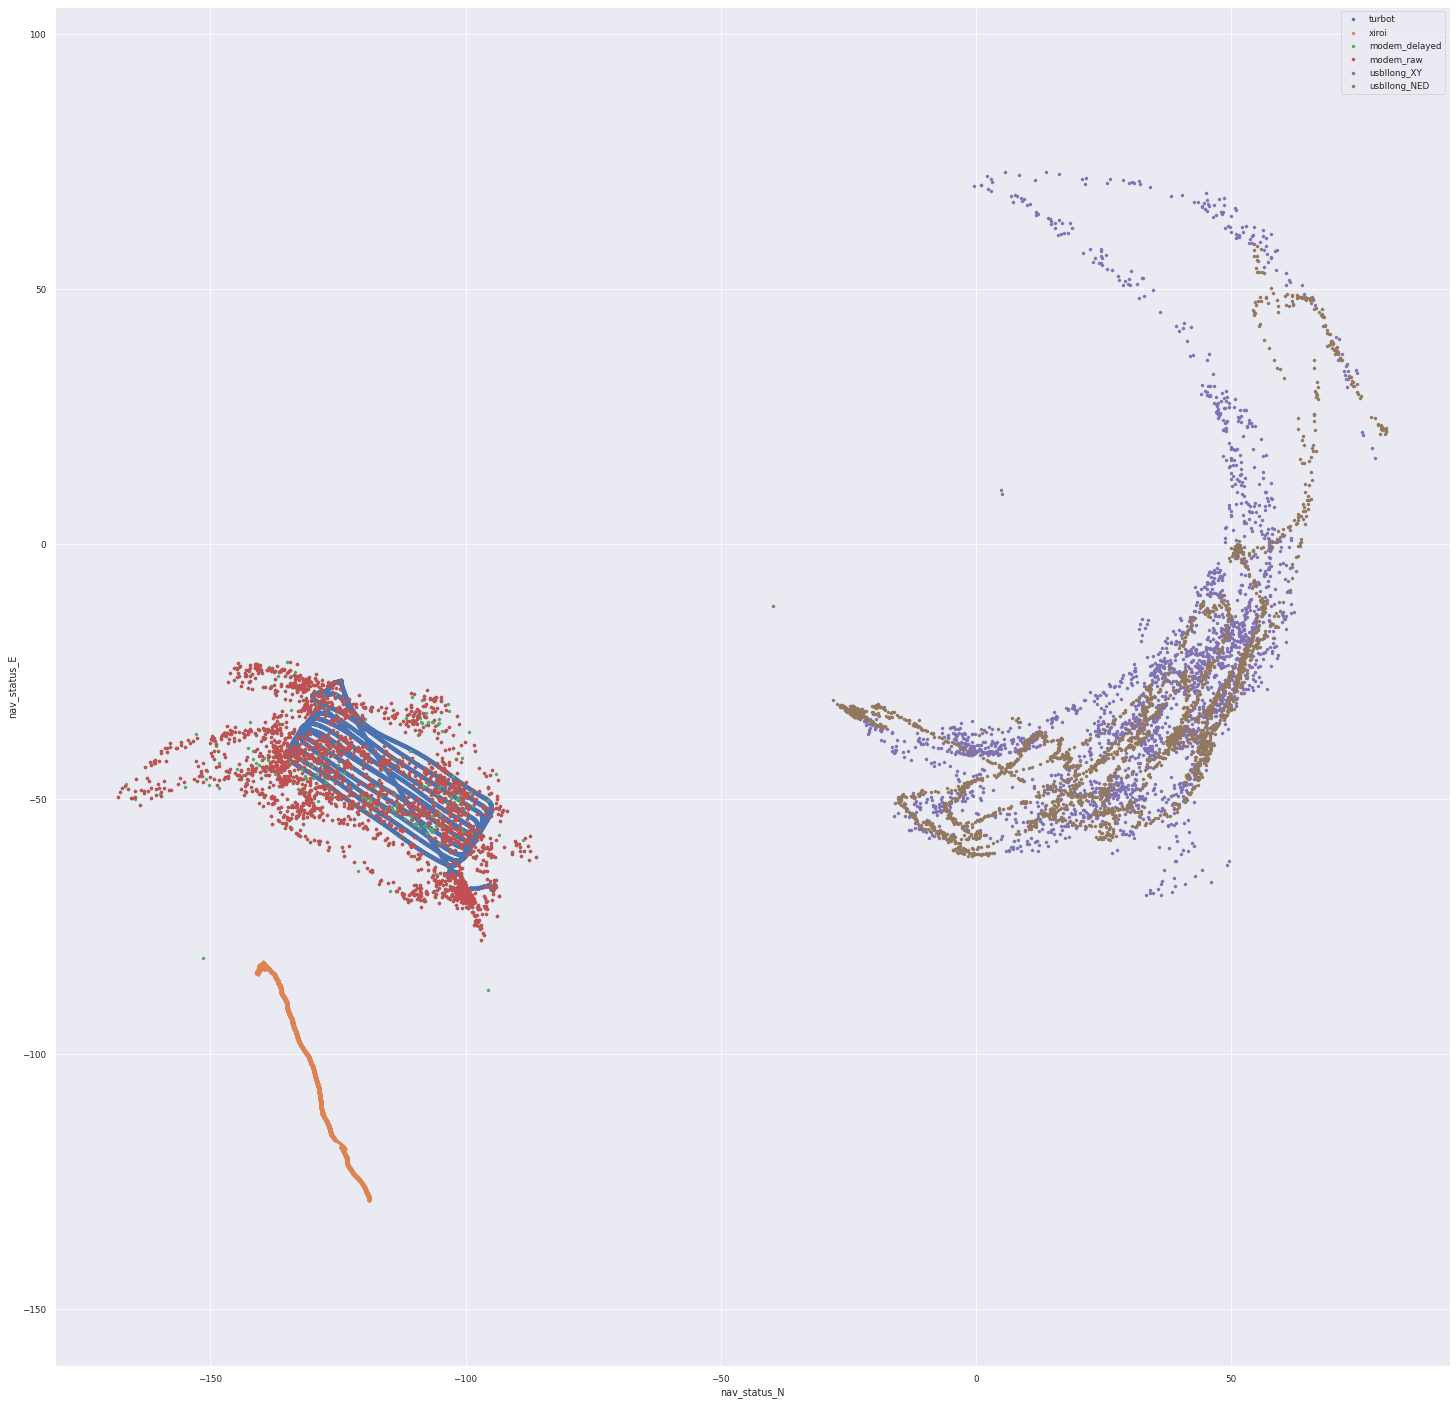

In [11]:
# Plot localization + USBllon +modem
fig, ax = plt.subplots()
sns.scatterplot(data=turbot_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=xiroi_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

sns.scatterplot(data=modem_delayed,x="modem_delayed_X", y="modem_delayed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=modem_raw,x="modem_raw_X", y="modem_raw_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)

sns.scatterplot(data=USBLlon,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=USBLlon,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
plt.legend(["turbot","xiroi","modem_delayed","modem_raw","usbllong_XY","usbllong_NED"])

plt.axis('equal')
plt.show()

In [12]:
#Create a unified dataframe:
nav = turbot_nav_status.join(xiroi_nav_status, lsuffix='_turbot', rsuffix='_xiroi').dropna()
display(nav.head())
nav=nav.join(USBLlon).dropna()
display(nav.head())
nav=nav.join(modem_delayed).dropna()
display(nav.head())
nav=nav.join(modem_raw).dropna()
display(nav.head())

nav_status_D_turbot  nav_status_E_turbot  \
stamp                                                               
2021-09-17 09:28:49.800             0.022931           -43.770015   
2021-09-17 09:28:49.900             0.031220           -43.762093   
2021-09-17 09:28:50.000             0.040538           -43.754566   
2021-09-17 09:28:50.100             0.048884           -43.748192   
2021-09-17 09:28:50.200             0.056990           -43.748785   

                         nav_status_N_turbot  nav_status_alt_turbot  \
stamp                                                                 
2021-09-17 09:28:49.800          -113.367716              31.495430   
2021-09-17 09:28:49.900          -113.372805              31.494913   
2021-09-17 09:28:50.000          -113.377959              31.485075   
2021-09-17 09:28:50.100          -113.380392              31.478092   
2021-09-17 09:28:50.200          -113.392855              31.455921   

                         nav_status_origin_lat_turbot  \
stamp                                                   
2021-09-17 09:28:49.800                       39.1546   
2021-09-17 09:28:49.900                       39.1546   
2021-09-17 09:28:50.000                       39.1546   
2021-09-17 09:28:50.100                       39.1546   
2021-09-17 09:28:50.200                       39.1546   

                         nav_status_origin_lon_turbot  \
stamp                                                   
2021-09-17 09:28:49.800                        2.9449   
2021-09-17 09:28:49.900                        2.9449   
2021-09-17 09:28:50.000                        2.9449   
2021-09-17 09:28:50.100                        2.9449   
2021-09-17 09:28:50.200                        2.9449   

                         nav_status_pitch_turbot  nav_status_roll_turbot  \
stamp                                                                      
2021-09-17 09:28:49.800                 0.117670               -0.068121   
2021-09-17 09:28:49.900                 0.126534               -0.069380   
2021-09-17 09:28:50.000                 0.133199               -0.070460   
2021-09-17 09:28:50.100                 0.144302               -0.072652   
2021-09-17 09:28:50.200                 0.153250               -0.073739   

                         nav_status_yaw_turbot  nav_status_D_xiroi  \
stamp                                                                
2021-09-17 09:28:49.800               2.547807                 0.0   
2021-09-17 09:28:49.900               2.543822                 0.0   
2021-09-17 09:28:50.000               2.540109                 0.0   
2021-09-17 09:28:50.100               2.533172                 0.0   
2021-09-17 09:28:50.200               2.528569                 0.0   

                         nav_status_E_xiroi  nav_status_N_xiroi  \
stamp                                                             
2021-09-17 09:28:49.800          -82.695588         -139.772221   
2021-09-17 09:28:49.900          -82.707011         -139.770820   
2021-09-17 09:28:50.000          -82.715005         -139.771059   
2021-09-17 09:28:50.100          -82.723076         -139.767133   
2021-09-17 09:28:50.200          -82.729740         -139.765125   

                         nav_status_alt_xiroi  nav_status_origin_lat_xiroi  \
stamp                                                                        
2021-09-17 09:28:49.800                   0.0                      39.1546   
2021-09-17 09:28:49.900                   0.0                      39.1546   
2021-09-17 09:28:50.000                   0.0                      39.1546   
2021-09-17 09:28:50.100                   0.0                      39.1546   
2021-09-17 09:28:50.200                   0.0                      39.1546   

                         nav_status_origin_lon_xiroi  nav_status_pitch_xiroi  \
stamp                                                                          
2021-09-17 09:28:49.800                   

nav_status_D_turbot  nav_status_E_turbot  \
stamp                                                               
2021-09-17 09:30:09.800             0.300925           -29.717308   
2021-09-17 09:30:10.900             0.386696           -29.586821   
2021-09-17 09:30:15.100             0.807948           -29.345242   
2021-09-17 09:30:16.200             0.938829           -29.363844   
2021-09-17 09:30:23.900             1.831488           -29.217467   

                         nav_status_N_turbot  nav_status_alt_turbot  \
stamp                                                                 
2021-09-17 09:30:09.800          -130.043904              30.017508   
2021-09-17 09:30:10.900          -130.034050              29.802186   
2021-09-17 09:30:15.100          -129.952583              29.592103   
2021-09-17 09:30:16.200          -129.798034              29.468796   
2021-09-17 09:30:23.900          -129.155283              28.409944   

                         nav_status_origin_lat_turbot  \
stamp                                                   
2021-09-17 09:30:09.800                       39.1546   
2021-09-17 09:30:10.900                       39.1546   
2021-09-17 09:30:15.100                       39.1546   
2021-09-17 09:30:16.200                       39.1546   
2021-09-17 09:30:23.900                       39.1546   

                         nav_status_origin_lon_turbot  \
stamp                                                   
2021-09-17 09:30:09.800                        2.9449   
2021-09-17 09:30:10.900                        2.9449   
2021-09-17 09:30:15.100                        2.9449   
2021-09-17 09:30:16.200                        2.9449   
2021-09-17 09:30:23.900                        2.9449   

                         nav_status_pitch_turbot  nav_status_roll_turbot  \
stamp                                                                      
2021-09-17 09:30:09.800                 0.083947               -0.024909   
2021-09-17 09:30:10.900                 0.014631               -0.077699   
2021-09-17 09:30:15.100                -0.115669               -0.020296   
2021-09-17 09:30:16.200                -0.097326                0.027728   
2021-09-17 09:30:23.900                -0.009734               -0.119622   

                         nav_status_yaw_turbot  nav_status_D_xiroi  ...  \
stamp                                                               ...   
2021-09-17 09:30:09.800               1.188614                 0.0  ...   
2021-09-17 09:30:10.900               1.081052                 0.0  ...   
2021-09-17 09:30:15.100               0.731854                 0.0  ...   
2021-09-17 09:30:16.200               0.676429                 0.0  ...   
2021-09-17 09:30:23.900               0.190007                 0.0  ...   

                         nav_status_yaw_xiroi  usbllong_D  usbllong_E  \
stamp                                                                   
2021-09-17 09:30:09.800              2.120570     -6.7924  -25.449900   
2021-09-17 09:30:10.900              2.140283     -5.8936  -26.538900   
2021-09-17 09:30:15.100              2.091521     -7.3851  -28.083799   
2021-09-17 09:30:16.200              2.100636     -7.6002  -27.416300   
2021-09-17 09:30:23.900              1.995504     -3.9434  -30.318701   

                         usbllong_N  usbllong_X  usbllong_Y  usbllong_Z  \
stamp                                                                     
2021-09-17 09:30:09.800   45.122299   37.892899  -35.637402     -4.8949   
2021-09-17 09:30:10.900   44.943100   33.128399  -40.430000     -5.1815   
2021-09-17 09:30:15.100   44.253799   36.012901  -38.148701     -7.0273   
2021-09-17 09:30:16.200   44.620098   37.517101  -36.870998     -5.7762   
2021-09-17 09:30:23.900   43.423901   41.201099  -33.345402     -3.3102   

                         usbllong_pitch  usbllong_roll  usbllong_yaw  
stamp                                                                 
2021

nav_status_D_turbot  nav_status_E_turbot  \
stamp                                                               
2021-09-17 09:30:09.800             0.300925           -29.717308   
2021-09-17 09:30:10.900             0.386696           -29.586821   
2021-09-17 09:30:15.100             0.807948           -29.345242   
2021-09-17 09:30:16.200             0.938829           -29.363844   
2021-09-17 09:30:23.900             1.831488           -29.217467   

                         nav_status_N_turbot  nav_status_alt_turbot  \
stamp                                                                 
2021-09-17 09:30:09.800          -130.043904              30.017508   
2021-09-17 09:30:10.900          -130.034050              29.802186   
2021-09-17 09:30:15.100          -129.952583              29.592103   
2021-09-17 09:30:16.200          -129.798034              29.468796   
2021-09-17 09:30:23.900          -129.155283              28.409944   

                         nav_status_origin_lat_turbot  \
stamp                                                   
2021-09-17 09:30:09.800                       39.1546   
2021-09-17 09:30:10.900                       39.1546   
2021-09-17 09:30:15.100                       39.1546   
2021-09-17 09:30:16.200                       39.1546   
2021-09-17 09:30:23.900                       39.1546   

                         nav_status_origin_lon_turbot  \
stamp                                                   
2021-09-17 09:30:09.800                        2.9449   
2021-09-17 09:30:10.900                        2.9449   
2021-09-17 09:30:15.100                        2.9449   
2021-09-17 09:30:16.200                        2.9449   
2021-09-17 09:30:23.900                        2.9449   

                         nav_status_pitch_turbot  nav_status_roll_turbot  \
stamp                                                                      
2021-09-17 09:30:09.800                 0.083947               -0.024909   
2021-09-17 09:30:10.900                 0.014631               -0.077699   
2021-09-17 09:30:15.100                -0.115669               -0.020296   
2021-09-17 09:30:16.200                -0.097326                0.027728   
2021-09-17 09:30:23.900                -0.009734               -0.119622   

                         nav_status_yaw_turbot  nav_status_D_xiroi  ...  \
stamp                                                               ...   
2021-09-17 09:30:09.800               1.188614                 0.0  ...   
2021-09-17 09:30:10.900               1.081052                 0.0  ...   
2021-09-17 09:30:15.100               0.731854                 0.0  ...   
2021-09-17 09:30:16.200               0.676429                 0.0  ...   
2021-09-17 09:30:23.900               0.190007                 0.0  ...   

                         usbllong_pitch  usbllong_roll  usbllong_yaw  \
stamp                                                                  
2021-09-17 09:30:09.800          0.0213         0.0307        0.2400   
2021-09-17 09:30:10.900          0.0106         0.0089        0.3512   
2021-09-17 09:30:15.100          0.0325        -0.0211        0.2543   
2021-09-17 09:30:16.200          0.0307         0.0183        0.2265   
2021-09-17 09:30:23.900          0.0620        -0.0571        0.0784   

                         modem_delayed_X  modem_delayed_Y  modem_delayed_Z  \
stamp                                                                        
2021-09-17 09:30:09.800      -129.226977       -31.348820          -5.9924   
2021-09-17 09:30:10.900      -123.286680       -32.790772          -5.0936   
2021-09-17 09:30:15.100      -124.736136       -31.958331          -6.5851   
2021-09-17 09:30:16.200      -126.279339       -31.395701          -6.8002   
2021-09-17 09:30:23.900      -126.461079       -30.923367          -3.1434   

                         modem_delayed_ori_W  modem_delayed_ori_X  \
stamp                                                          

nav_status_D_turbot  nav_status_E_turbot  \
stamp                                                               
2021-09-17 09:30:15.100             0.807948           -29.345242   
2021-09-17 09:30:23.900             1.831488           -29.217467   
2021-09-17 09:30:28.300             2.295449           -29.038667   
2021-09-17 09:30:29.800             2.431758           -28.988356   
2021-09-17 09:30:30.800             2.538556           -28.983949   

                         nav_status_N_turbot  nav_status_alt_turbot  \
stamp                                                                 
2021-09-17 09:30:15.100          -129.952583              29.592103   
2021-09-17 09:30:23.900          -129.155283              28.409944   
2021-09-17 09:30:28.300          -128.714342              28.054847   
2021-09-17 09:30:29.800          -128.569768              27.920354   
2021-09-17 09:30:30.800          -128.474306              27.826817   

                         nav_status_origin_lat_turbot  \
stamp                                                   
2021-09-17 09:30:15.100                       39.1546   
2021-09-17 09:30:23.900                       39.1546   
2021-09-17 09:30:28.300                       39.1546   
2021-09-17 09:30:29.800                       39.1546   
2021-09-17 09:30:30.800                       39.1546   

                         nav_status_origin_lon_turbot  \
stamp                                                   
2021-09-17 09:30:15.100                        2.9449   
2021-09-17 09:30:23.900                        2.9449   
2021-09-17 09:30:28.300                        2.9449   
2021-09-17 09:30:29.800                        2.9449   
2021-09-17 09:30:30.800                        2.9449   

                         nav_status_pitch_turbot  nav_status_roll_turbot  \
stamp                                                                      
2021-09-17 09:30:15.100                -0.115669               -0.020296   
2021-09-17 09:30:23.900                -0.009734               -0.119622   
2021-09-17 09:30:28.300                 0.042340               -0.091753   
2021-09-17 09:30:29.800                 0.051062               -0.075295   
2021-09-17 09:30:30.800                 0.062664               -0.068038   

                         nav_status_yaw_turbot  nav_status_D_xiroi  ...  \
stamp                                                               ...   
2021-09-17 09:30:15.100               0.731854                 0.0  ...   
2021-09-17 09:30:23.900               0.190007                 0.0  ...   
2021-09-17 09:30:28.300              -0.012513                 0.0  ...   
2021-09-17 09:30:29.800              -0.070568                 0.0  ...   
2021-09-17 09:30:30.800              -0.103660                 0.0  ...   

                         modem_delayed_ori_X  modem_delayed_ori_Y  \
stamp                                                               
2021-09-17 09:30:15.100                  0.0                  0.0   
2021-09-17 09:30:23.900                  0.0                  0.0   
2021-09-17 09:30:28.300                  0.0                  0.0   
2021-09-17 09:30:29.800                  0.0                  0.0   
2021-09-17 09:30:30.800                  0.0                  0.0   

                         modem_delayed_ori_Z  modem_raw_X  modem_raw_Y  \
stamp                                                                    
2021-09-17 09:30:15.100             0.865843  -124.736136   -31.958331   
2021-09-17 09:30:23.900             0.841084  -126.461079   -30.923367   
2021-09-17 09:30:28.300             0.837958  -127.872060   -30.321807   
2021-09-17 09:30:29.800             0.828587  -127.000608   -30.971374   
2021-09-17 09:30:30.800             0.823784  -127.542649   -30.966877   

                         modem_raw_Z  modem_raw_ori_W  modem_raw_ori_X  \
stamp                                                                    
2021-09-17 09:30:15.100      -6.5

In [13]:
nav['horitz_dist'] = np.sqrt(np.power(nav['nav_status_E_turbot']-nav['nav_status_E_xiroi'],2)+np.power(nav['nav_status_N_turbot']-nav['nav_status_N_xiroi'],2))
nav['vertical_dist'] = nav['nav_status_D_turbot']-nav['nav_status_D_xiroi']
nav['dist']=np.sqrt(np.power(nav['horitz_dist'],2)+np.power(nav['vertical_dist'],2))

nav['E_dist'] = np.abs(nav['nav_status_E_turbot']-nav['nav_status_E_xiroi'])
nav['N_dist'] = np.abs(nav['nav_status_N_turbot']-nav['nav_status_N_xiroi'])

#Transform usbllon XY to world orientation using rotation transformation matrix:
# x' = xcos(yaw) - ysin(yaw)
# y' = xsin(yaw) + cos(yaw)

nav['usbllong_X_transf'] = nav['usbllong_X']*np.cos(nav["nav_status_yaw_xiroi"])-nav['usbllong_Y']*np.sin(nav["nav_status_yaw_xiroi"])
nav['usbllong_Y_transf'] = nav['usbllong_X']*np.sin(nav["nav_status_yaw_xiroi"])+nav['usbllong_Y']*np.cos(nav["nav_status_yaw_xiroi"])

#Once USBLlon is transformed to world orientation we add it to xiroi position and it should be simiar to modem raw as USBllon is a distance from xiroi to turbot
#És suficient així o fa falta aplicar translació ???? -> Crec que basta rotar xq aixi ja està orientat a world i ho puc sumar a la posició en world del xiroi i hauria de ser aprox el modem ra, no?

#Tf transformació rotació en yaw sumada a la posició del xiroi
# # Hauria d aproximar-se a la posició del turbot, no? O com a mínim al modem raw
#Using xiroi IMU:
nav['usbllon_sumed_X'] = nav['nav_status_N_xiroi'] + nav['usbllong_X']*np.cos(nav["nav_status_yaw_xiroi"])-nav['usbllong_Y']*np.sin(nav["nav_status_yaw_xiroi"])
nav['usbllon_sumed_Y'] = nav['nav_status_E_xiroi'] + nav['usbllong_X']*np.sin(nav["nav_status_yaw_xiroi"])+nav['usbllong_Y']*np.cos(nav["nav_status_yaw_xiroi"])

#USBL lon in NED added to xiroi to obtain turbot position acording to USBL distance and USBL IMU
nav['usbllong_N_glob'] = nav['nav_status_N_xiroi']+nav['usbllong_N']
nav['usbllong_E_glob'] = nav['nav_status_E_xiroi']+nav['usbllong_E']



In [14]:
nav.head()

nav_status_D_turbot  nav_status_E_turbot  \
stamp                                                               
2021-09-17 09:30:15.100             0.807948           -29.345242   
2021-09-17 09:30:23.900             1.831488           -29.217467   
2021-09-17 09:30:28.300             2.295449           -29.038667   
2021-09-17 09:30:29.800             2.431758           -28.988356   
2021-09-17 09:30:30.800             2.538556           -28.983949   

                         nav_status_N_turbot  nav_status_alt_turbot  \
stamp                                                                 
2021-09-17 09:30:15.100          -129.952583              29.592103   
2021-09-17 09:30:23.900          -129.155283              28.409944   
2021-09-17 09:30:28.300          -128.714342              28.054847   
2021-09-17 09:30:29.800          -128.569768              27.920354   
2021-09-17 09:30:30.800          -128.474306              27.826817   

                         nav_status_origin_lat_turbot  \
stamp                                                   
2021-09-17 09:30:15.100                       39.1546   
2021-09-17 09:30:23.900                       39.1546   
2021-09-17 09:30:28.300                       39.1546   
2021-09-17 09:30:29.800                       39.1546   
2021-09-17 09:30:30.800                       39.1546   

                         nav_status_origin_lon_turbot  \
stamp                                                   
2021-09-17 09:30:15.100                        2.9449   
2021-09-17 09:30:23.900                        2.9449   
2021-09-17 09:30:28.300                        2.9449   
2021-09-17 09:30:29.800                        2.9449   
2021-09-17 09:30:30.800                        2.9449   

                         nav_status_pitch_turbot  nav_status_roll_turbot  \
stamp                                                                      
2021-09-17 09:30:15.100                -0.115669               -0.020296   
2021-09-17 09:30:23.900                -0.009734               -0.119622   
2021-09-17 09:30:28.300                 0.042340               -0.091753   
2021-09-17 09:30:29.800                 0.051062               -0.075295   
2021-09-17 09:30:30.800                 0.062664               -0.068038   

                         nav_status_yaw_turbot  nav_status_D_xiroi  ...  \
stamp                                                               ...   
2021-09-17 09:30:15.100               0.731854                 0.0  ...   
2021-09-17 09:30:23.900               0.190007                 0.0  ...   
2021-09-17 09:30:28.300              -0.012513                 0.0  ...   
2021-09-17 09:30:29.800              -0.070568                 0.0  ...   
2021-09-17 09:30:30.800              -0.103660                 0.0  ...   

                         vertical_dist       dist     E_dist     N_dist  \
stamp                                                                     
2021-09-17 09:30:15.100       0.807948  54.027804  53.145846   9.688648   
2021-09-17 09:30:23.900       1.831488  54.358637  53.318797  10.421754   
2021-09-17 09:30:28.300       2.295449  54.608008  53.447766  10.959094   
2021-09-17 09:30:29.800       2.431758  54.553808  53.332404  11.218697   
2021-09-17 09:30:30.800       2.538556  54.647707  53.414997  11.259026   

                         usbllong_X_transf  usbllong_Y_transf  \
stamp                                                           
2021-09-17 09:30:15.100          15.175707          50.219024   
2021-09-17 09:30:23.900          13.405888          51.280879   
2021-09-17 09:30:28.300          12.076986          51.832389   
2021-09-17 09:30:29.800          12.506891          51.150246   
2021-09-17 09:30:30.800          12.342187          51.124108   

                         usbllon_sumed_X  usbllon_sumed_Y  usbllong_N_glob  \
stamp                                                                        
2021-09-17 09:30:15.100      -124.465524      

In [15]:
subnav=nav[["usbllong_X","usbllong_Y","usbllong_Z","usbllong_X_transf","usbllon_sumed_X","usbllon_sumed_Y","usbllong_Y_transf","horitz_dist","vertical_dist","dist","E_dist","N_dist"]]
# subnav=nav["usbllong_X","usbllong_Y","usbllong_Z","horitz_dist","vertical_dist","dist","E_dist","N_dist","E_dist_x","N_dist_x","nav_status_yaw","yaw_deg"]
subnav.head()

usbllong_X  usbllong_Y  usbllong_Z  \
stamp                                                         
2021-09-17 09:30:15.100   36.012901  -38.148701     -7.0273   
2021-09-17 09:30:23.900   41.201099  -33.345402     -3.3102   
2021-09-17 09:30:28.300   42.609699  -31.888300     -5.1619   
2021-09-17 09:30:29.800   42.547401  -31.024000     -9.1431   
2021-09-17 09:30:30.800   43.363098  -29.759800     -9.9755   

                         usbllong_X_transf  usbllon_sumed_X  usbllon_sumed_Y  \
stamp                                                                          
2021-09-17 09:30:15.100          15.175707      -124.465524       -32.272065   
2021-09-17 09:30:23.900          13.405888      -126.171149       -31.255385   
2021-09-17 09:30:28.300          12.076986      -127.596450       -30.654043   
2021-09-17 09:30:29.800          12.506891      -127.281575       -31.170514   
2021-09-17 09:30:30.800          12.342187      -127.391145       -31.274839   

                         usbllong_Y_transf  horitz_dist  vertical_dist  \
stamp                                                                    
2021-09-17 09:30:15.100          50.219024    54.021763       0.807948   
2021-09-17 09:30:23.900          51.280879    54.327774       1.831488   
2021-09-17 09:30:28.300          51.832389    54.559742       2.295449   
2021-09-17 09:30:29.800          51.150246    54.499583       2.431758   
2021-09-17 09:30:30.800          51.124108    54.588713       2.538556   

                              dist     E_dist     N_dist  
stamp                                                     
2021-09-17 09:30:15.100  54.027804  53.145846   9.688648  
2021-09-17 09:30:23.900  54.358637  53.318797  10.421754  
2021-09-17 09:30:28.300  54.608008  53.447766  10.959094  
2021-09-17 09:30:29.800  54.553808  53.332404  11.218697  
2021-09-17 09:30:30.800  54.647707  53.414997  11.259026

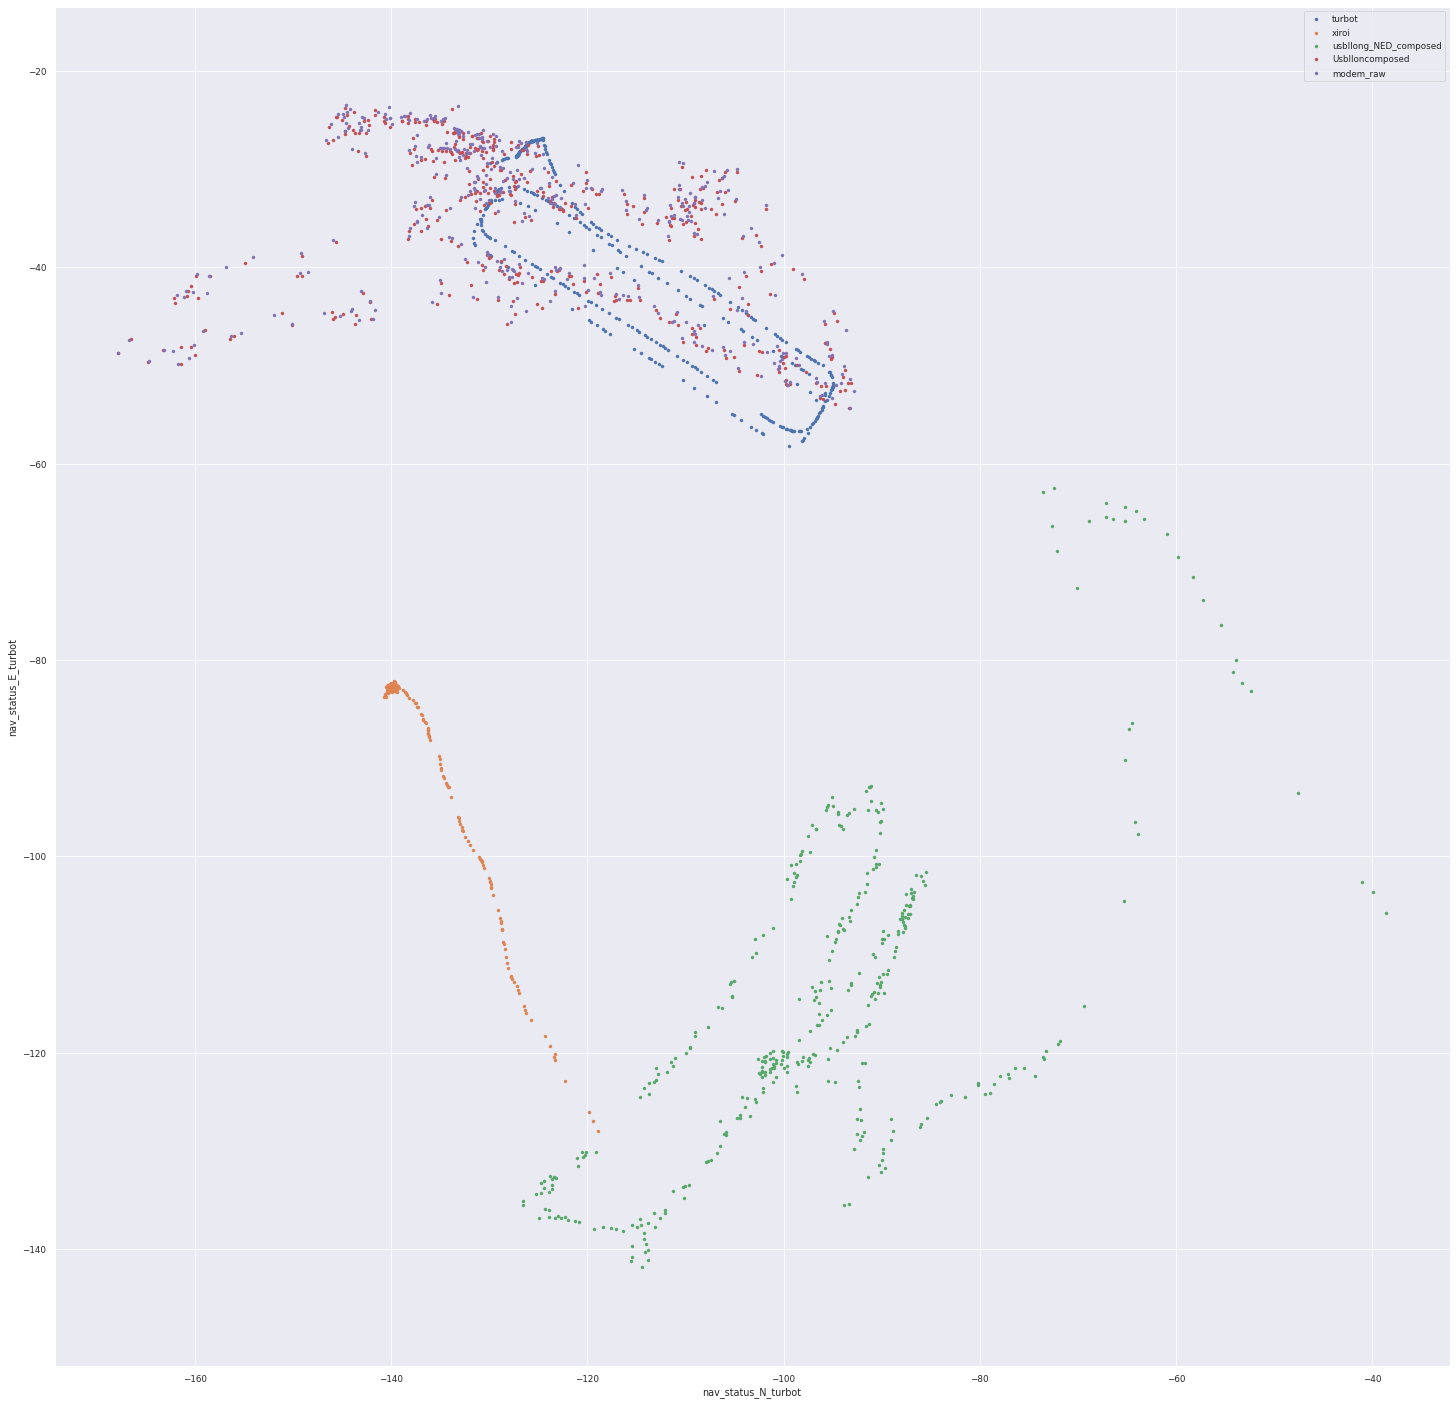

In [16]:
# Plot localization + USBLlon trandformed using xiroi IMU and using USBL IMU
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="nav_status_N_xiroi", y="nav_status_E_xiroi", hue=None, style=None, edgecolor=None, s=10, ax=ax)
#usbllon ned sumat a posicio xiroi
sns.scatterplot(data=nav,x="usbllong_N_glob", y="usbllong_E_glob", hue=None, style=None, edgecolor=None, s=10, ax=ax)

#sns.scatterplot(data=nav,x="modem_delayed_X", y="modem_delayed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
#sns.scatterplot(data=nav,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)

#USBL lon XY rotat i sumat a la posició del xiroi:
sns.scatterplot(data=nav,x="usbllon_sumed_X", y="usbllon_sumed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="modem_raw_X", y="modem_raw_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)

#sns.scatterplot(data=nav,x="usbllon_sumed_X", y="usbllon_sumed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
#sns.scatterplot(data=nav,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

plt.legend(["turbot","xiroi","usbllong_NED_composed","Usblloncomposed","modem_raw"])


plt.axis('equal')
plt.show()

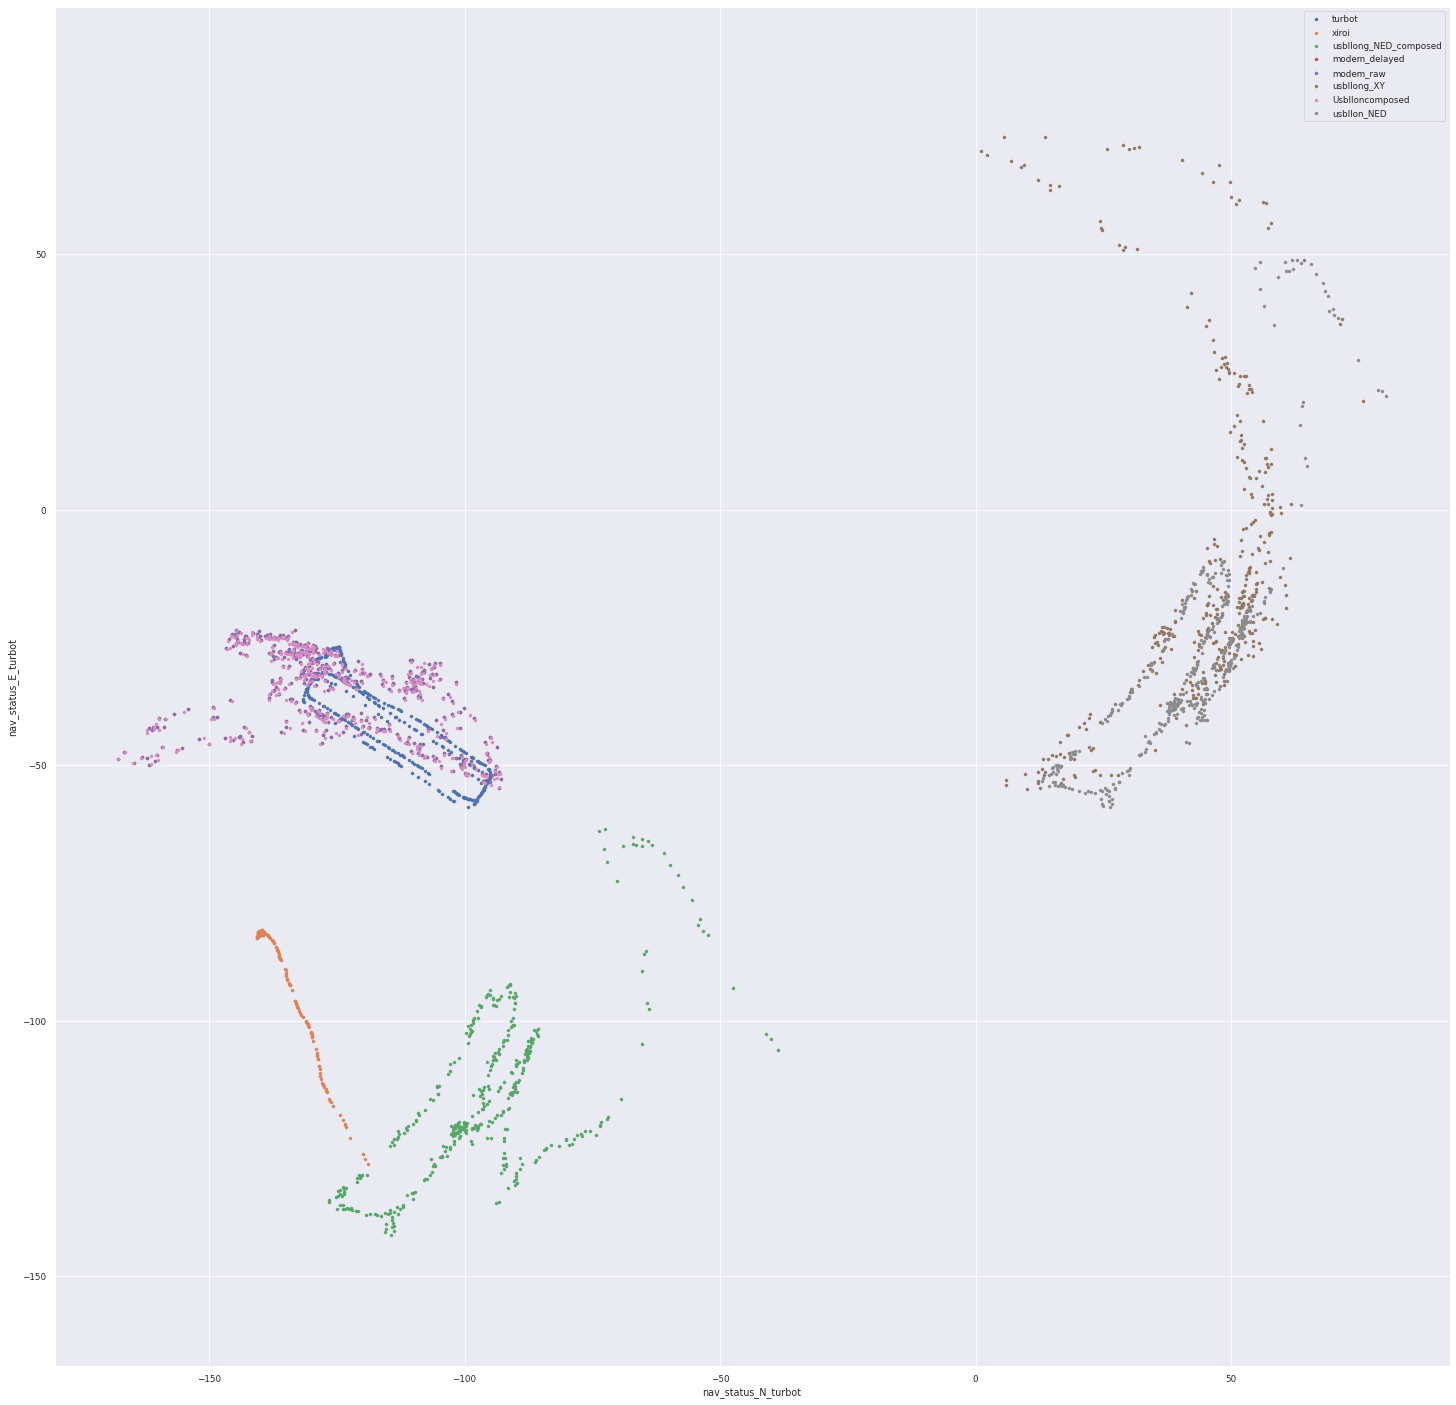

In [17]:
# Plot localization + USBL raw and transformed + modem_raw + modem_delayed
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="nav_status_N_xiroi", y="nav_status_E_xiroi", hue=None, style=None, edgecolor=None, s=10, ax=ax)
#usbllon ned sumat a posicio xiroi
sns.scatterplot(data=nav,x="usbllong_N_glob", y="usbllong_E_glob", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="modem_delayed_X", y="modem_delayed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="modem_raw_X", y="modem_raw_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="usbllong_X_transf", y="usbllong_Y_transf", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="usbllon_sumed_X", y="usbllon_sumed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)

sns.scatterplot(data=nav,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

plt.legend(["turbot","xiroi","usbllong_NED_composed","modem_delayed","modem_raw","usbllong_XY","Usblloncomposed","usbllon_NED"])


plt.axis('equal')
plt.show()

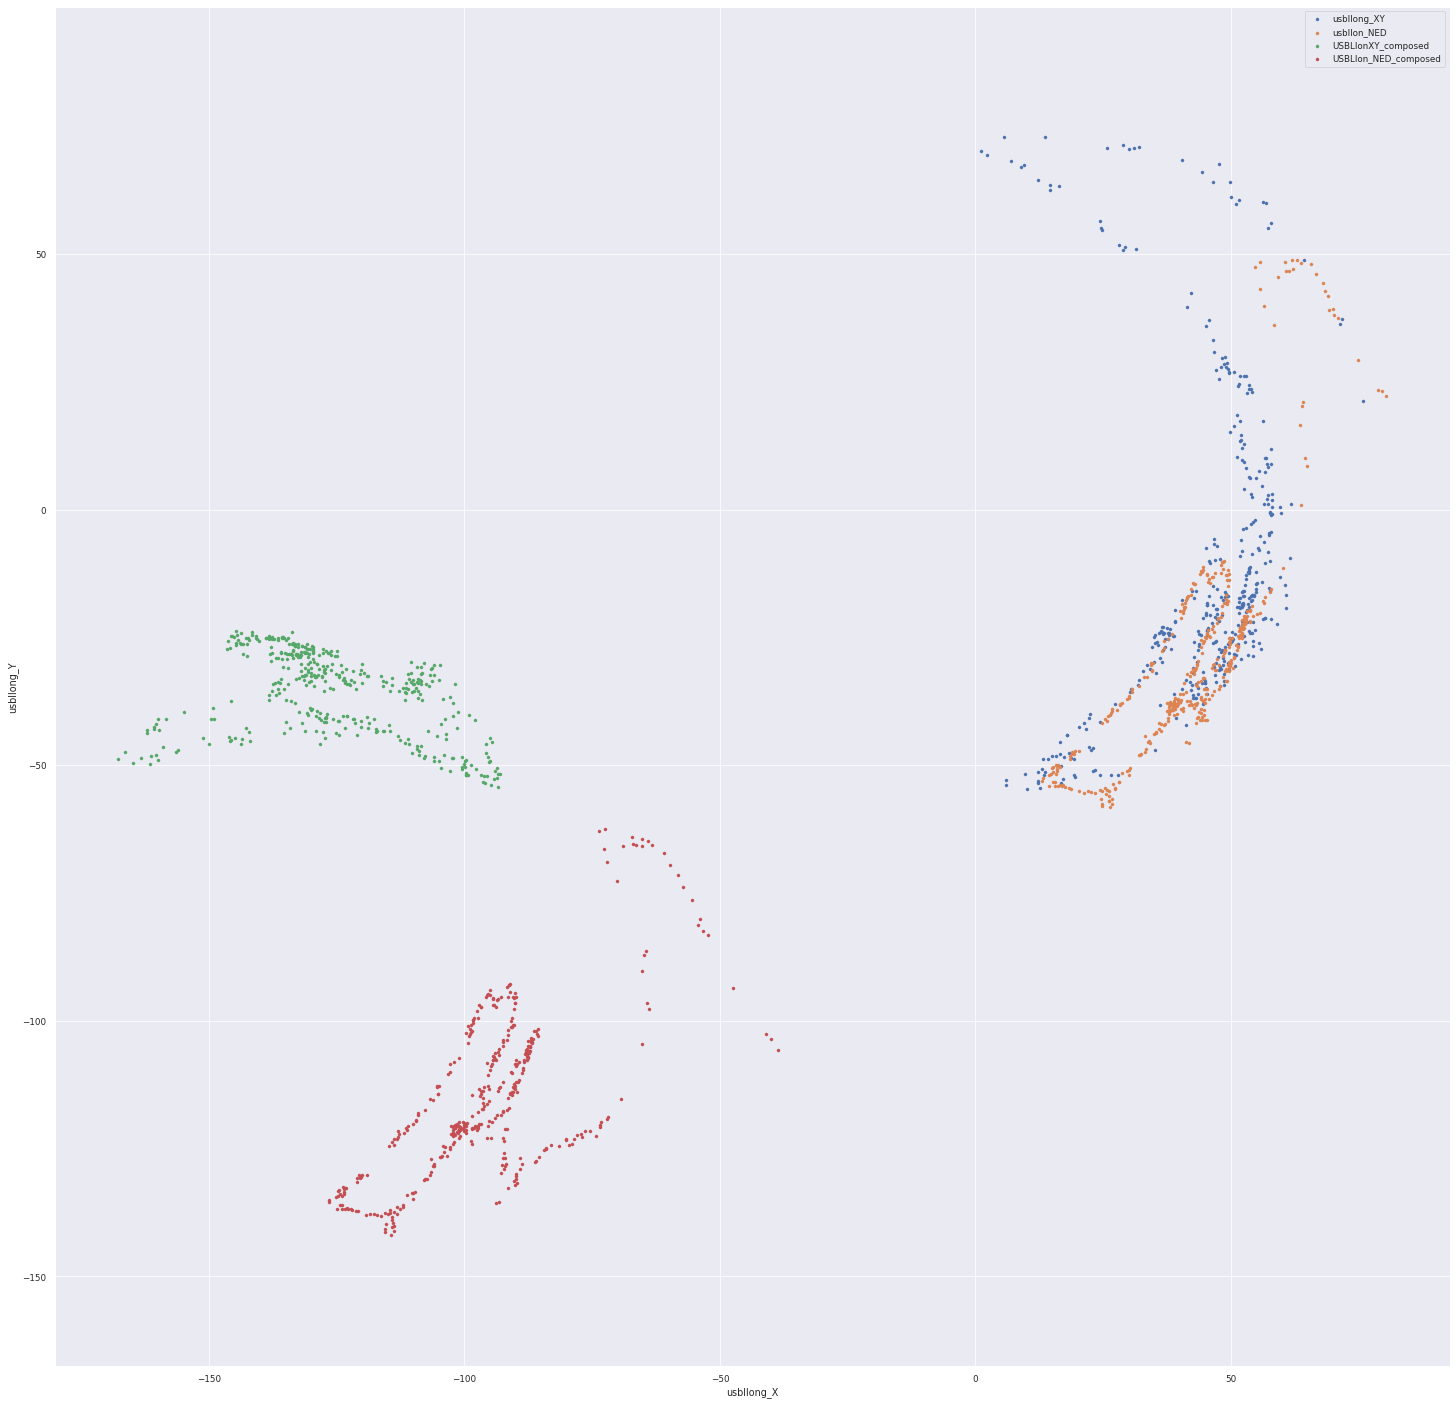

In [18]:
# Plot localization
fig, ax = plt.subplots()

sns.scatterplot(data=nav,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

sns.scatterplot(data=nav,x="usbllon_sumed_X", y="usbllon_sumed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="usbllong_N_glob", y="usbllong_E_glob", hue=None, style=None, edgecolor=None, s=10, ax=ax)


plt.legend(["usbllong_XY","usbllon_NED","USBLlonXY_composed","USBLlon_NED_composed"])


plt.axis('equal')
plt.show()

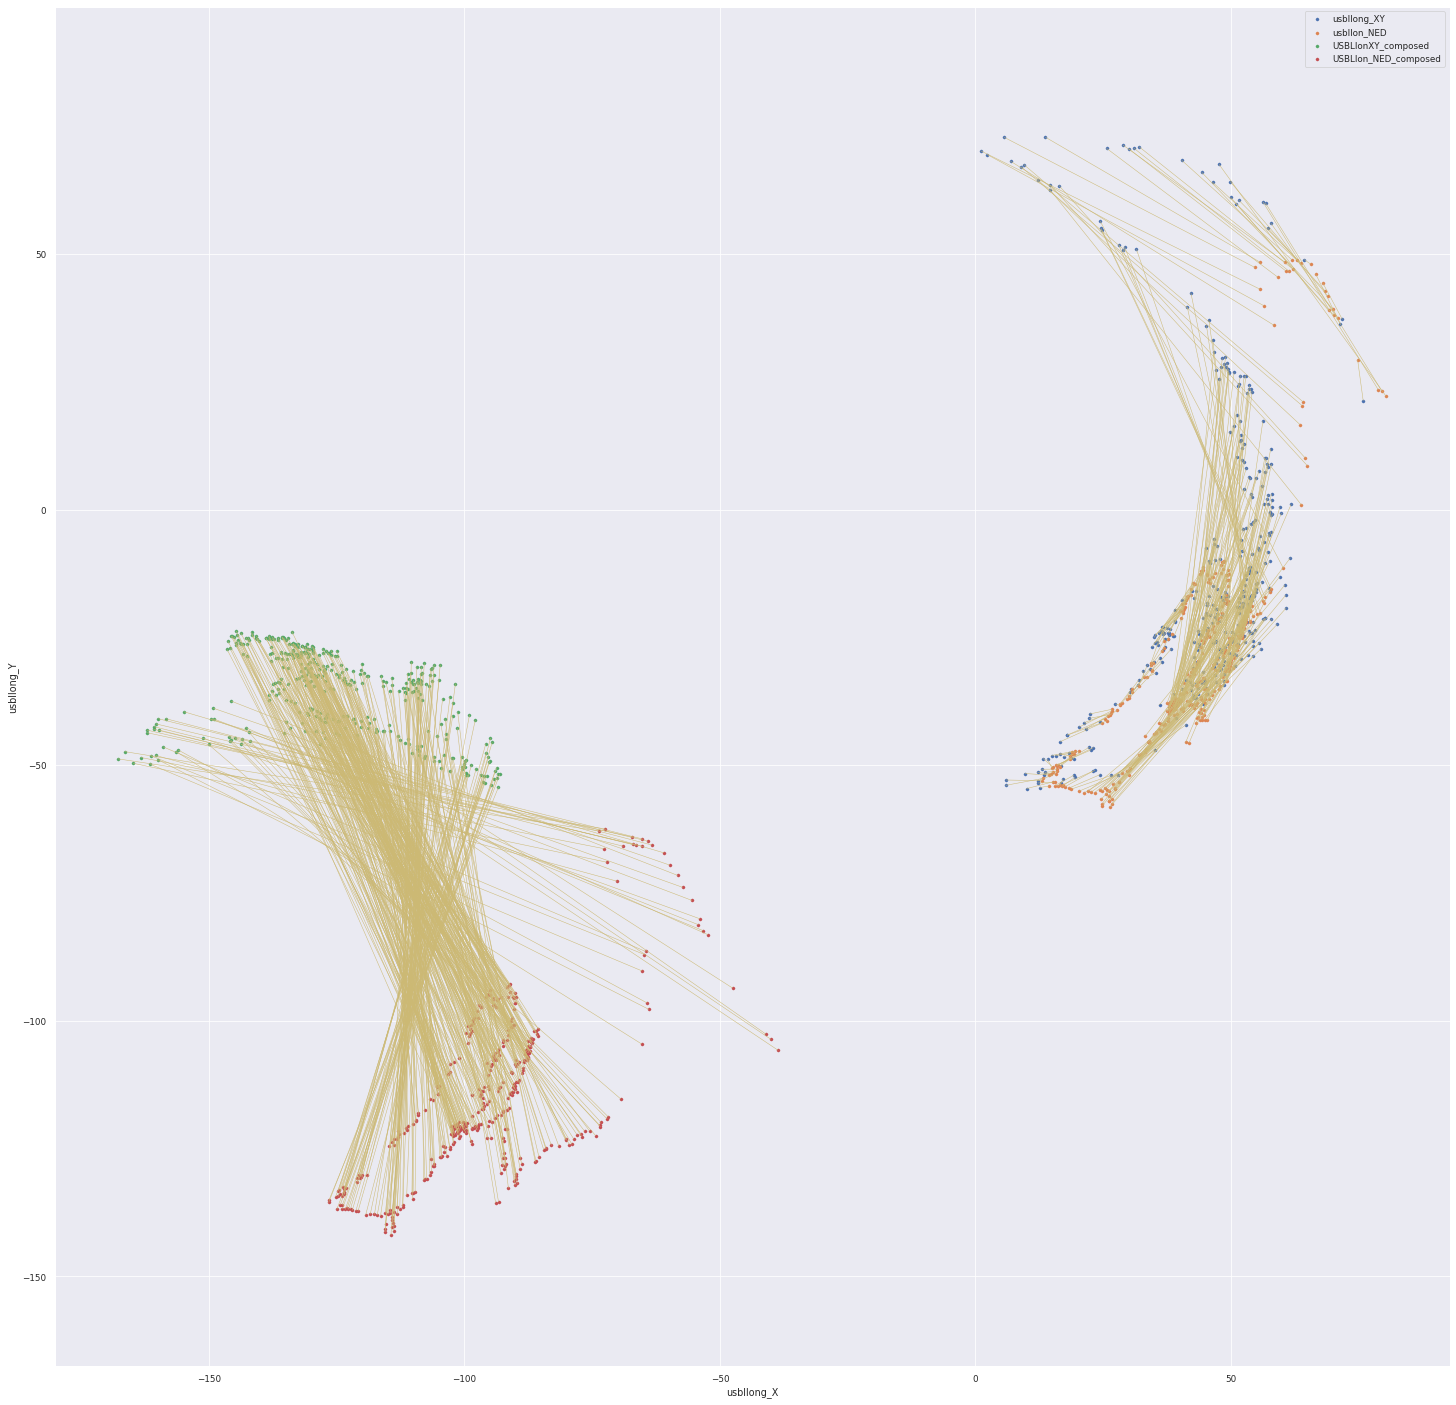

In [19]:
# Plot USBLlon XY and NED raw and transformed correlations
fig, ax = plt.subplots()

sns.scatterplot(data=nav,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

sns.scatterplot(data=nav,x="usbllon_sumed_X", y="usbllon_sumed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="usbllong_N_glob", y="usbllong_E_glob", hue=None, style=None, edgecolor=None, s=10, ax=ax)


plt.legend(["usbllong_XY","usbllon_NED","USBLlonXY_composed","USBLlon_NED_composed"])

for index, row in nav.iterrows():
    plt.plot([row.usbllong_N, row.usbllong_X], [row.usbllong_E, row.usbllong_Y], linewidth=0.5, c='y')
    

for index, row in nav.iterrows():
    plt.plot([row.usbllong_N_glob, row.usbllon_sumed_X], [row.usbllong_E_glob, row.usbllon_sumed_Y], linewidth=0.5, c='y')


plt.axis('equal')
plt.show()

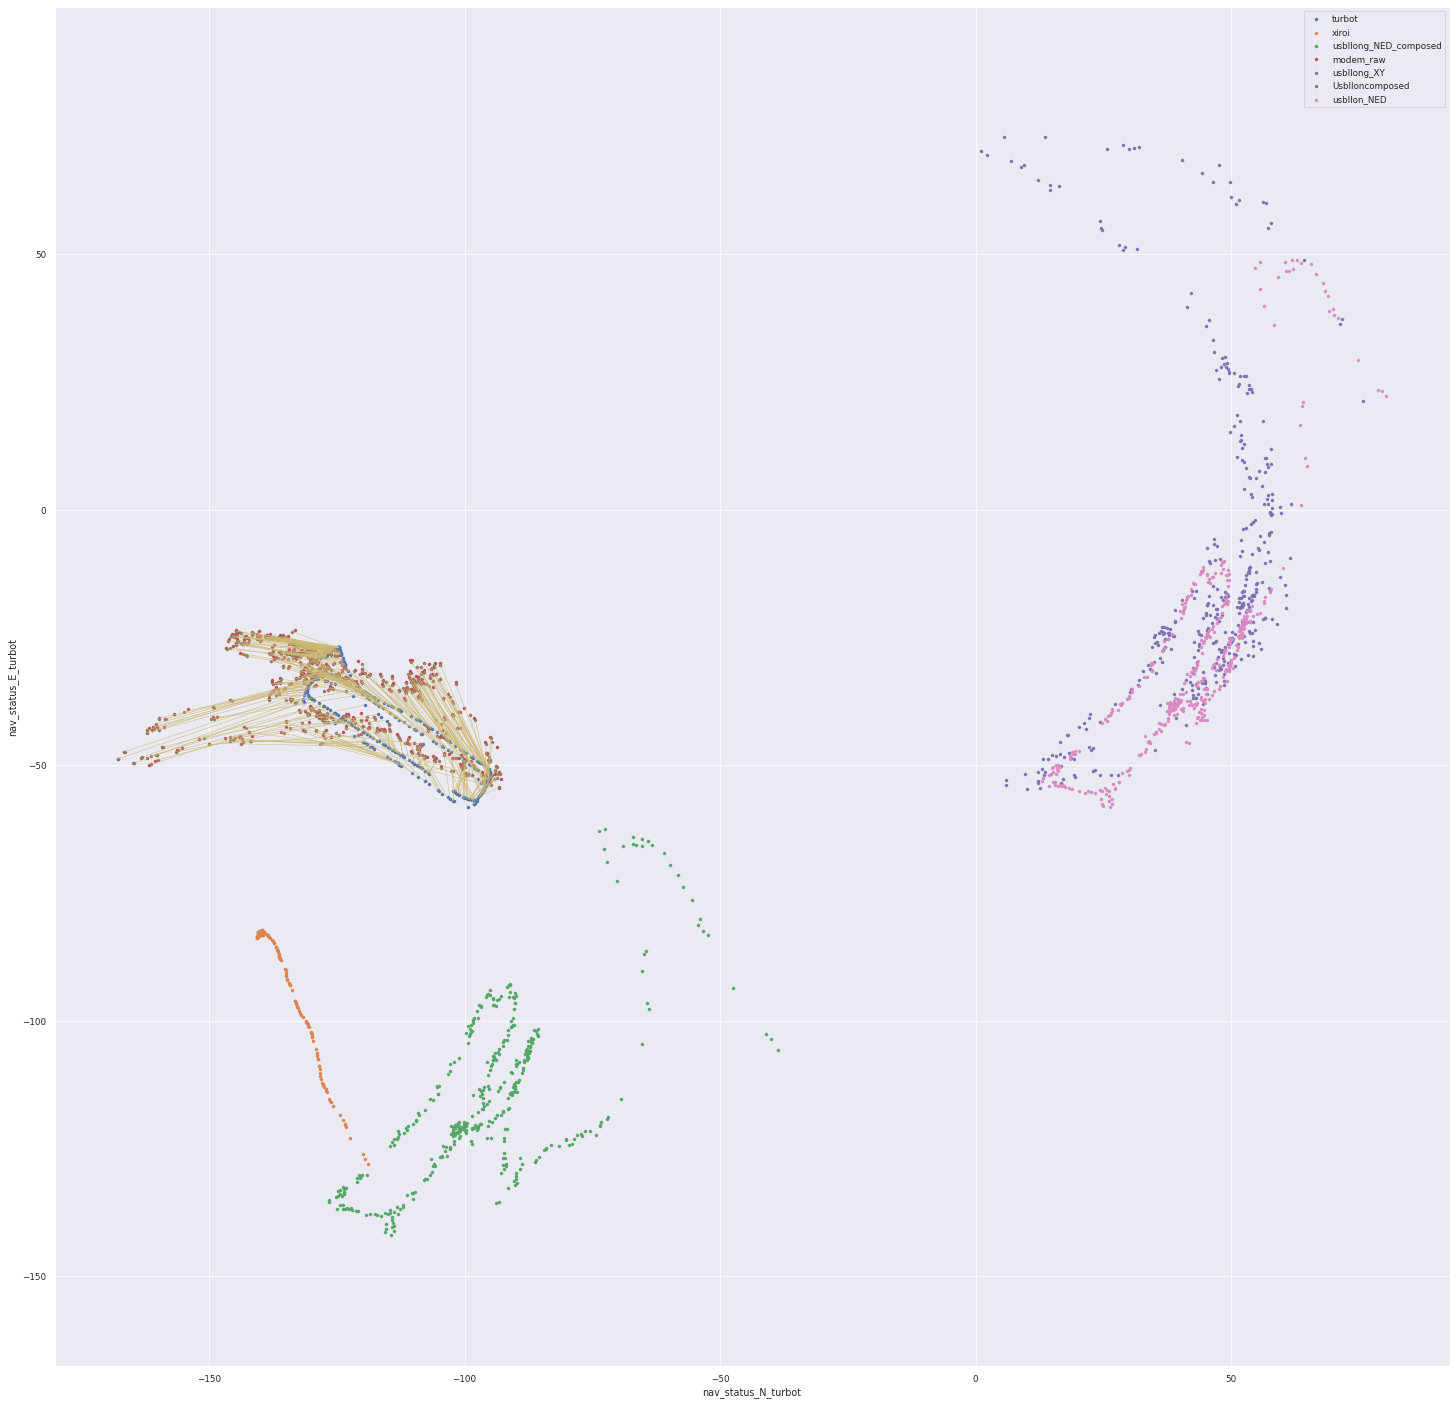

In [20]:
# Plot localization and USBLlonXY transformed and turbot position correlation

fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="nav_status_N_xiroi", y="nav_status_E_xiroi", hue=None, style=None, edgecolor=None, s=10, ax=ax)
#usbllon ned sumat a posicio xiroi
sns.scatterplot(data=nav,x="usbllong_N_glob", y="usbllong_E_glob", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="modem_delayed_X", y="modem_delayed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="modem_raw_X", y="modem_raw_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="usbllong_X_transf", y="usbllong_Y_transf", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="usbllon_sumed_X", y="usbllon_sumed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)

sns.scatterplot(data=nav,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

plt.legend(["turbot","xiroi","usbllong_NED_composed","modem_raw","usbllong_XY","Usblloncomposed","usbllon_NED"])

for index, row in nav.iterrows():
    plt.plot([row.usbllon_sumed_X, row.nav_status_N_turbot], [row.usbllon_sumed_Y, row.nav_status_E_turbot], linewidth=0.5, c='y')


plt.axis('equal')
plt.show()

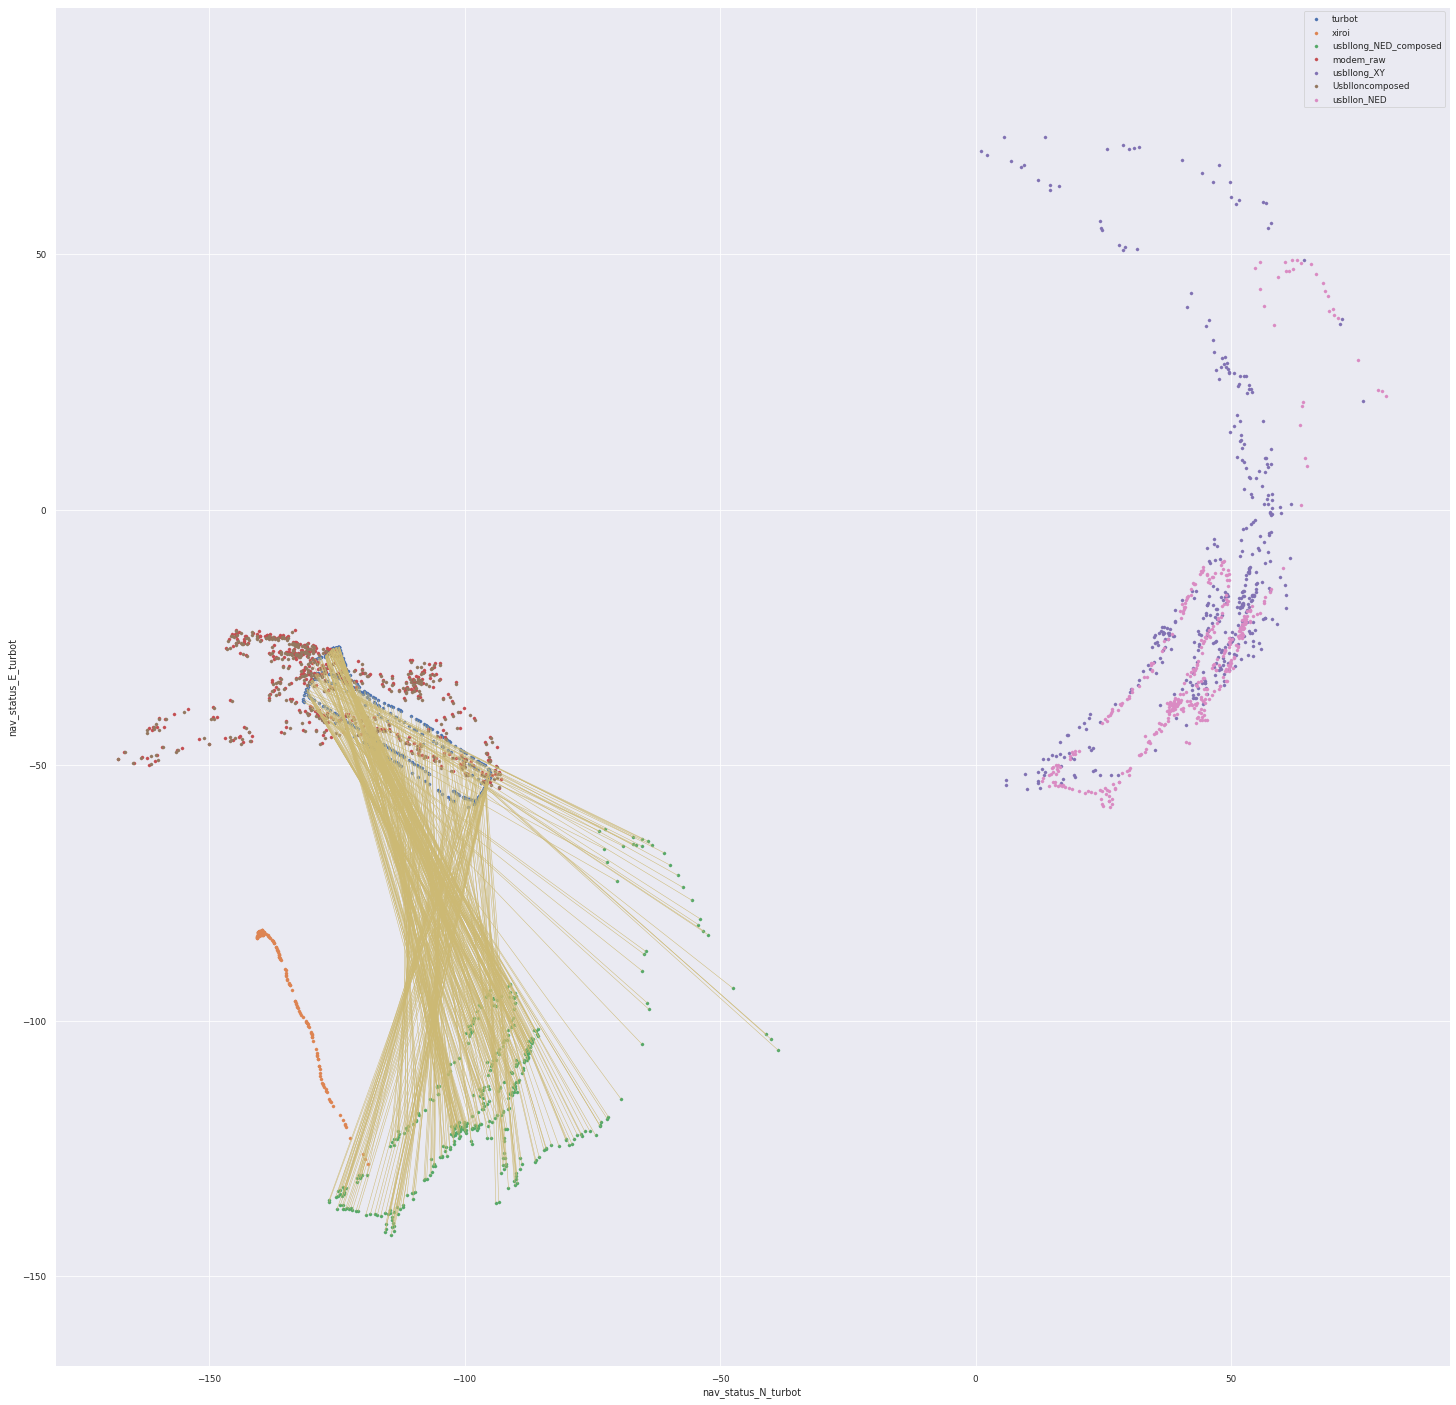

In [21]:
# Plot localization and USBLlonNED transformed and turbot position correlation

fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="nav_status_N_xiroi", y="nav_status_E_xiroi", hue=None, style=None, edgecolor=None, s=10, ax=ax)
#usbllon ned sumat a posicio xiroi
sns.scatterplot(data=nav,x="usbllong_N_glob", y="usbllong_E_glob", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="modem_delayed_X", y="modem_delayed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="modem_raw_X", y="modem_raw_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="usbllong_X_transf", y="usbllong_Y_transf", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="usbllon_sumed_X", y="usbllon_sumed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)

sns.scatterplot(data=nav,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

plt.legend(["turbot","xiroi","usbllong_NED_composed","modem_raw","usbllong_XY","Usblloncomposed","usbllon_NED"])

for index, row in nav.iterrows():
    plt.plot([row.usbllong_N_glob, row.nav_status_N_turbot], [row.usbllong_E_glob, row.nav_status_E_turbot], linewidth=0.5, c='y')


plt.axis('equal')
plt.show()

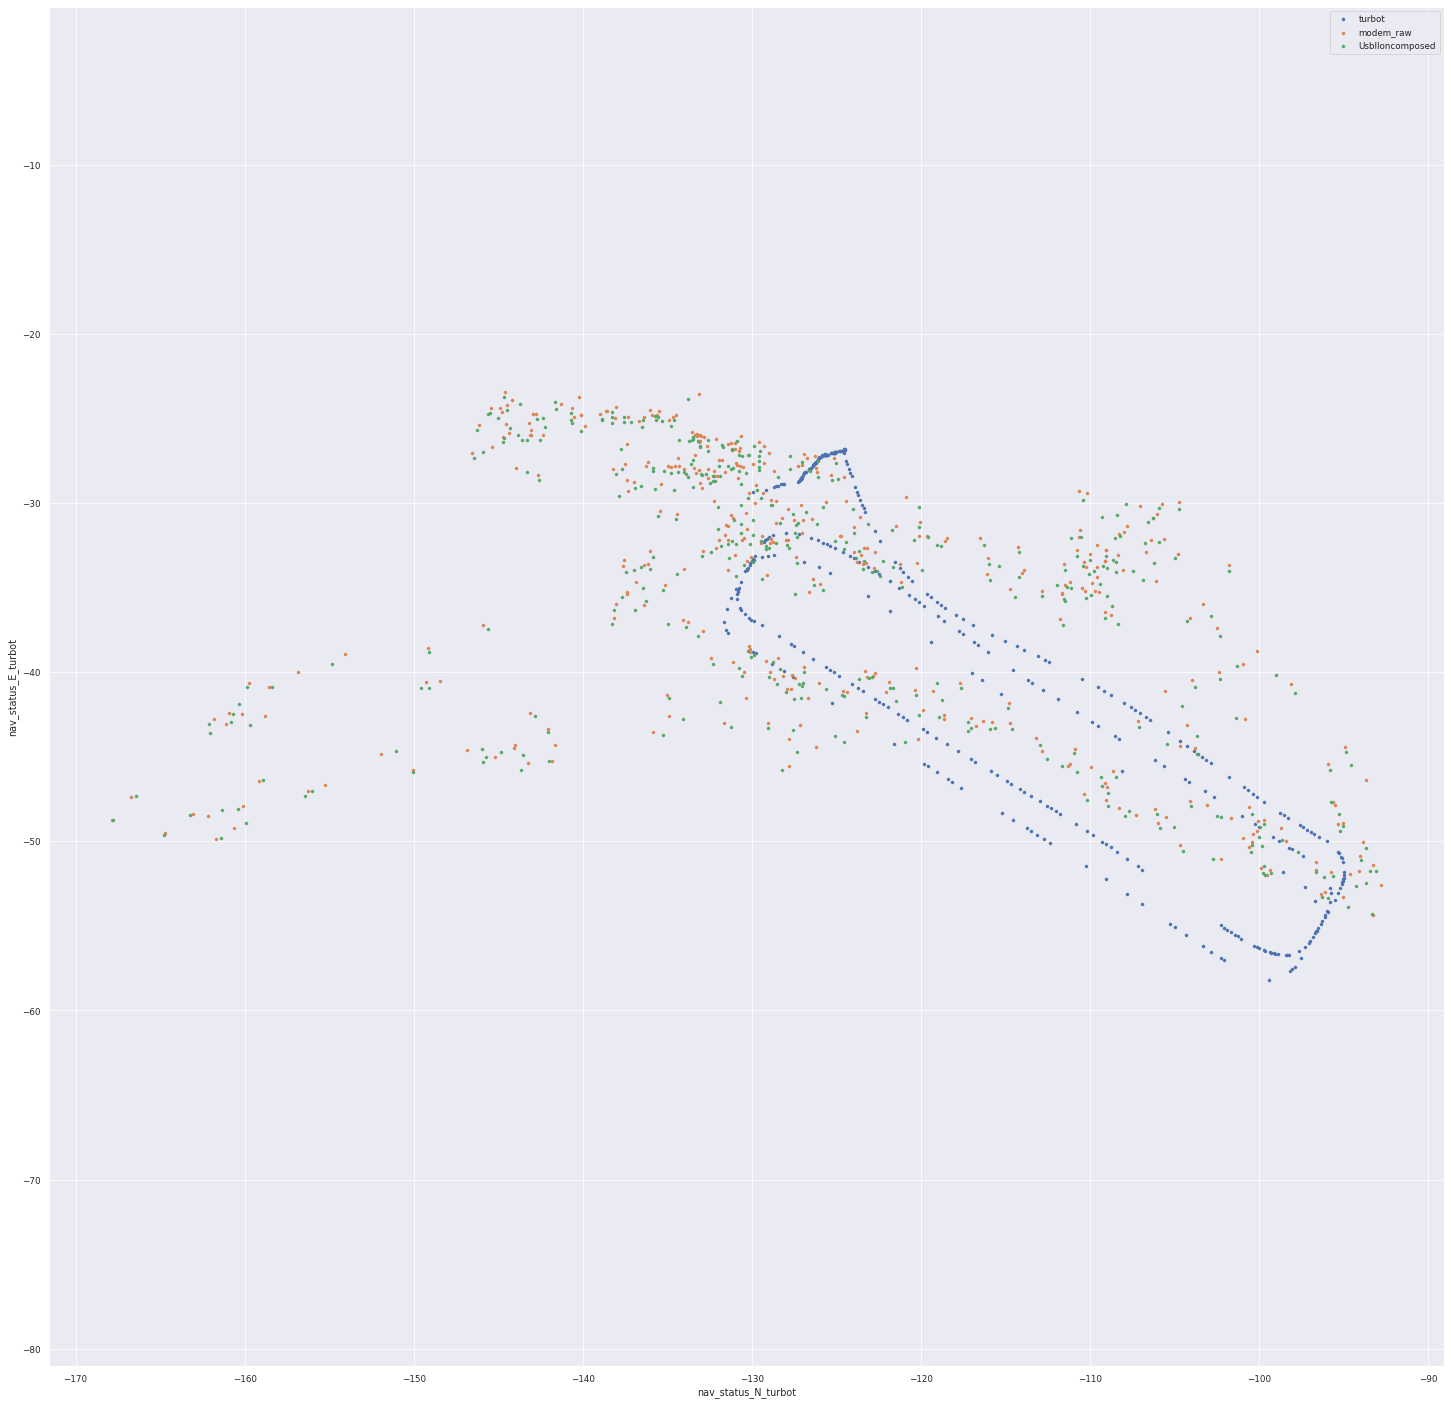

In [22]:
# Plot localization + usbllon transformed and modem_raw
# Usbllon transformed (rotated and added to xiroi pos) and modem_raw should be similar:

fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="nav_status_E_xiroi", y="nav_status_N_xiroi", hue=None, style=None, edgecolor=None, s=10, ax=ax)
#usbllon ned sumat a posicio xiroi
# sns.scatterplot(data=nav,x="usbllong_E_glob", y="usbllong_N_glob", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="modem_delayed_X", y="modem_delayed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="modem_raw_X", y="modem_raw_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="usbllong_X_transf", y="usbllong_Y_transf", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="usbllon_sumed_X", y="usbllon_sumed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)

# sns.scatterplot(data=nav,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

plt.legend(["turbot","modem_raw","Usblloncomposed"])



plt.axis('equal')
plt.show()

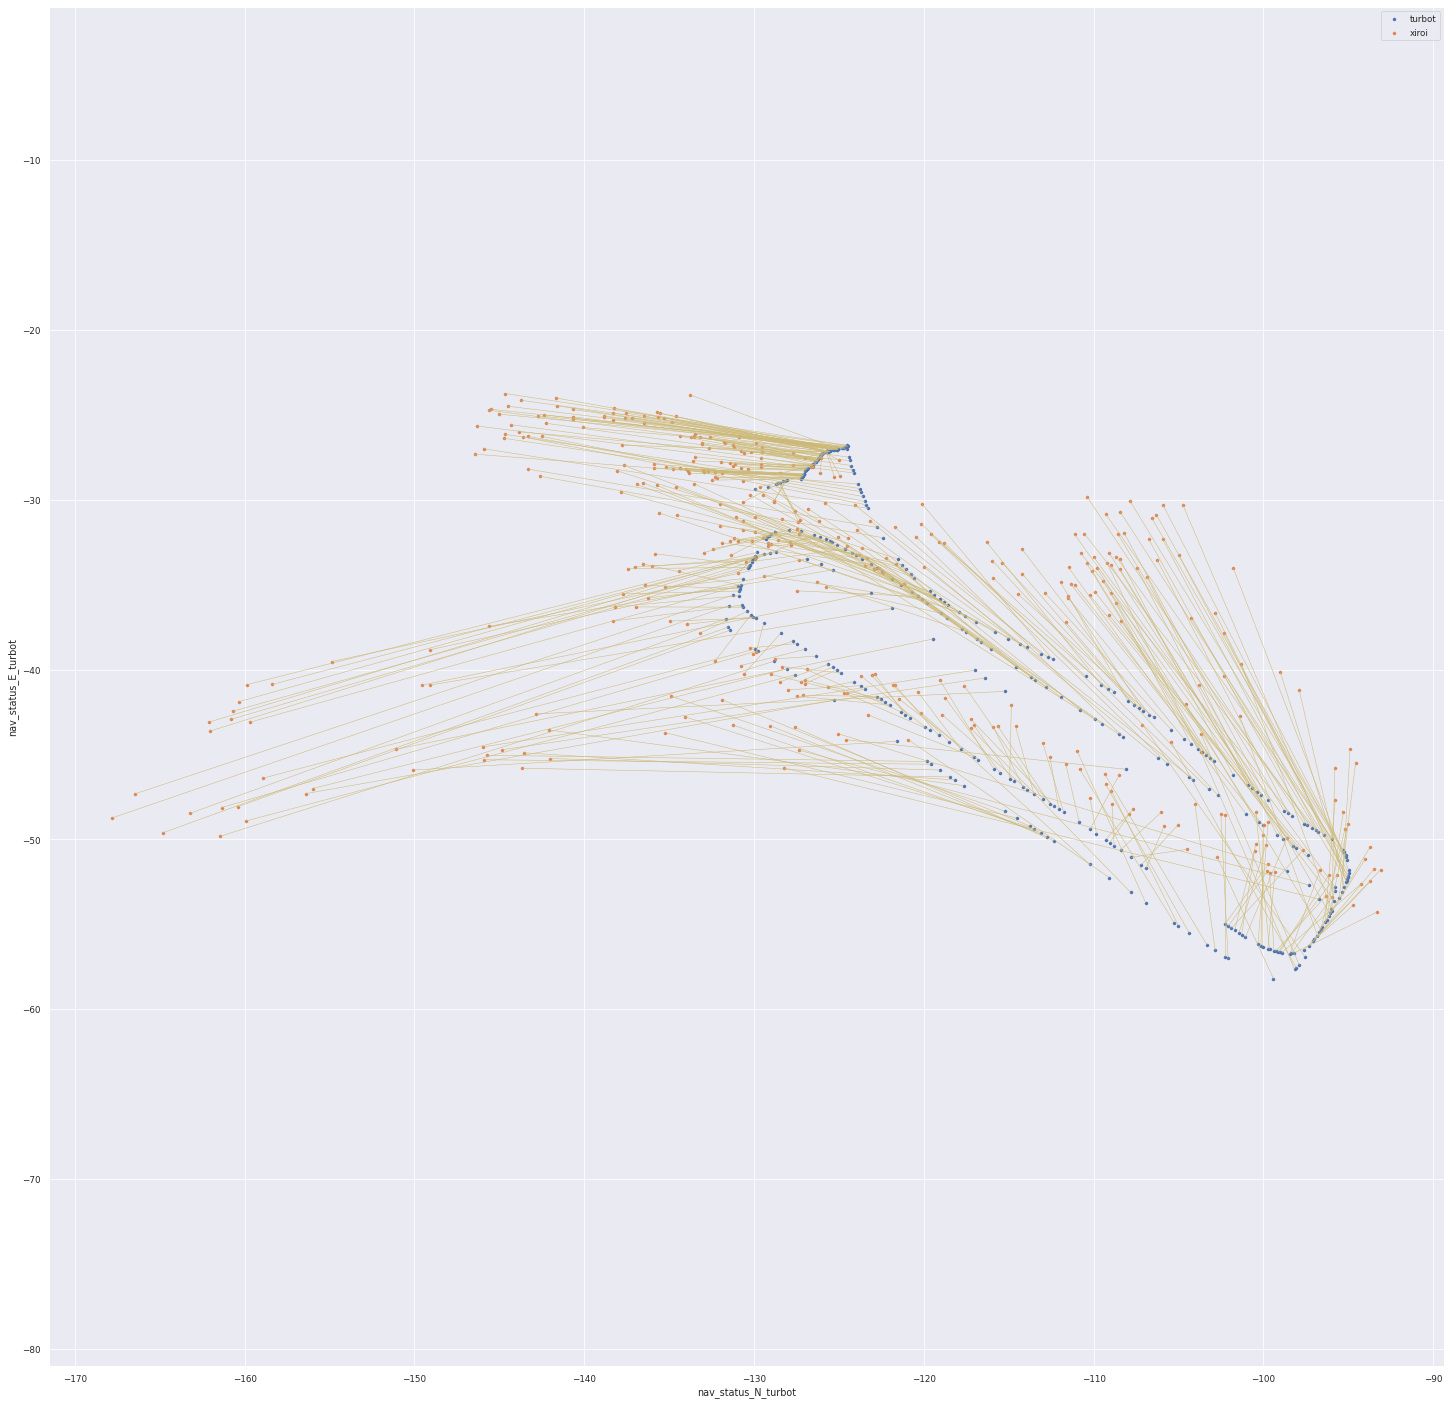

In [23]:
# Plot localization
#USBLlon composed + NAV STATUS correlation
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="nav_status_E_xiroi", y="nav_status_N_xiroi", hue=None, style=None, edgecolor=None, s=10, ax=ax)
#usbllon ned sumat a posicio xiroi
# sns.scatterplot(data=nav,x="usbllong_E_glob", y="usbllong_N_glob", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="modem_delayed_X", y="modem_delayed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="modem_raw_X", y="modem_raw_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="usbllong_X_transf", y="usbllong_Y_transf", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="usbllon_sumed_X", y="usbllon_sumed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)

# sns.scatterplot(data=nav,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

plt.legend(["turbot","xiroi","usbllong_NED_composed","modem_raw","usbllong_XY","Usblloncomposed","usbllon_NED"])

for index, row in nav.iterrows():
    plt.plot([row.usbllon_sumed_X, row.nav_status_N_turbot], [row.usbllon_sumed_Y, row.nav_status_E_turbot], linewidth=0.5, c='y')


plt.axis('equal')
plt.show()

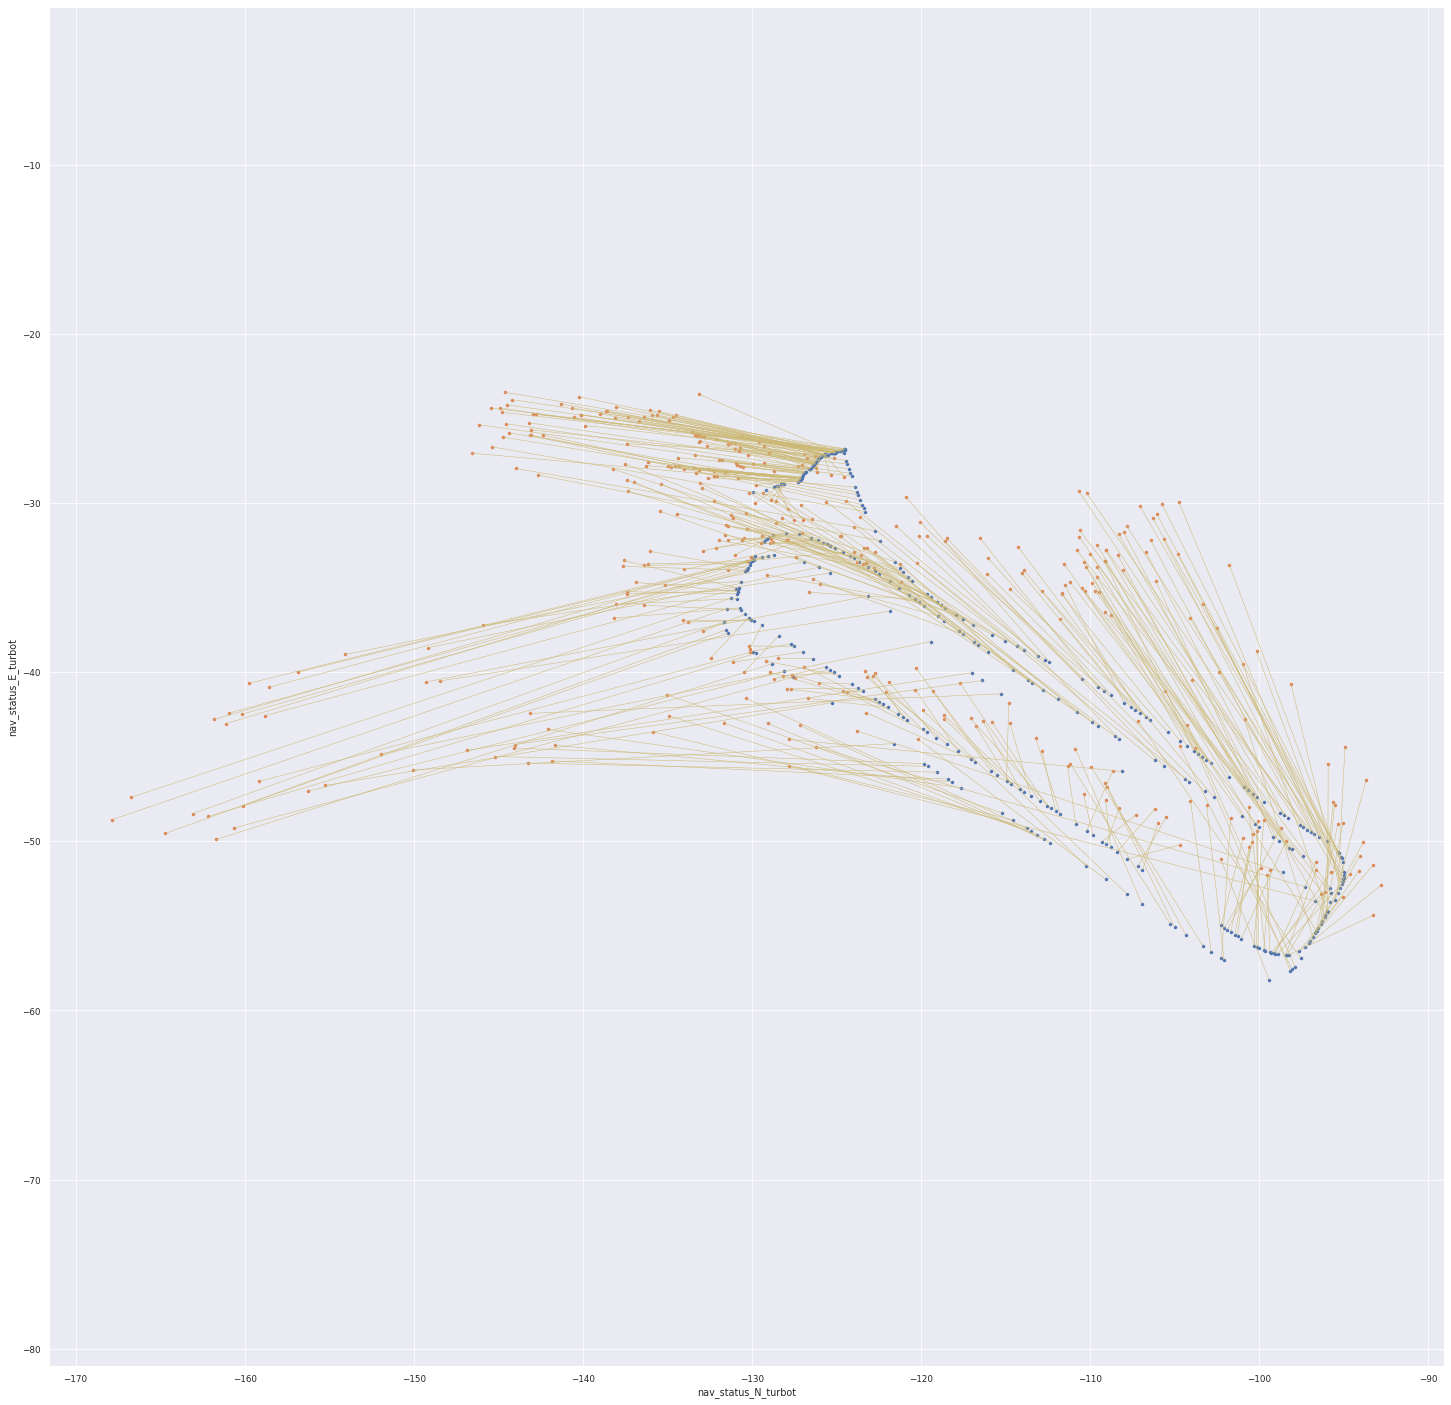

In [24]:
# Plot localization
# MODEM RAW + NAV STATUS correlations
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="nav_status_E_xiroi", y="nav_status_N_xiroi", hue=None, style=None, edgecolor=None, s=10, ax=ax)
#usbllon ned sumat a posicio xiroi
# sns.scatterplot(data=nav,x="usbllong_E_glob", y="usbllong_N_glob", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="modem_delayed_X", y="modem_delayed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="modem_raw_X", y="modem_raw_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="usbllong_X_transf", y="usbllong_Y_transf", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="usbllon_sumed_X", y="usbllon_sumed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)

# sns.scatterplot(data=nav,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

# plt.legend(["turbot","xiroi","usbllong_NED_composed","modem_raw","usbllong_XY","Usblloncomposed","usbllon_NED"])

for index, row in nav.iterrows():
    plt.plot([row.modem_raw_X, row.nav_status_N_turbot], [row.modem_raw_Y, row.nav_status_E_turbot], linewidth=0.5, c='y')


plt.axis('equal')
plt.show()

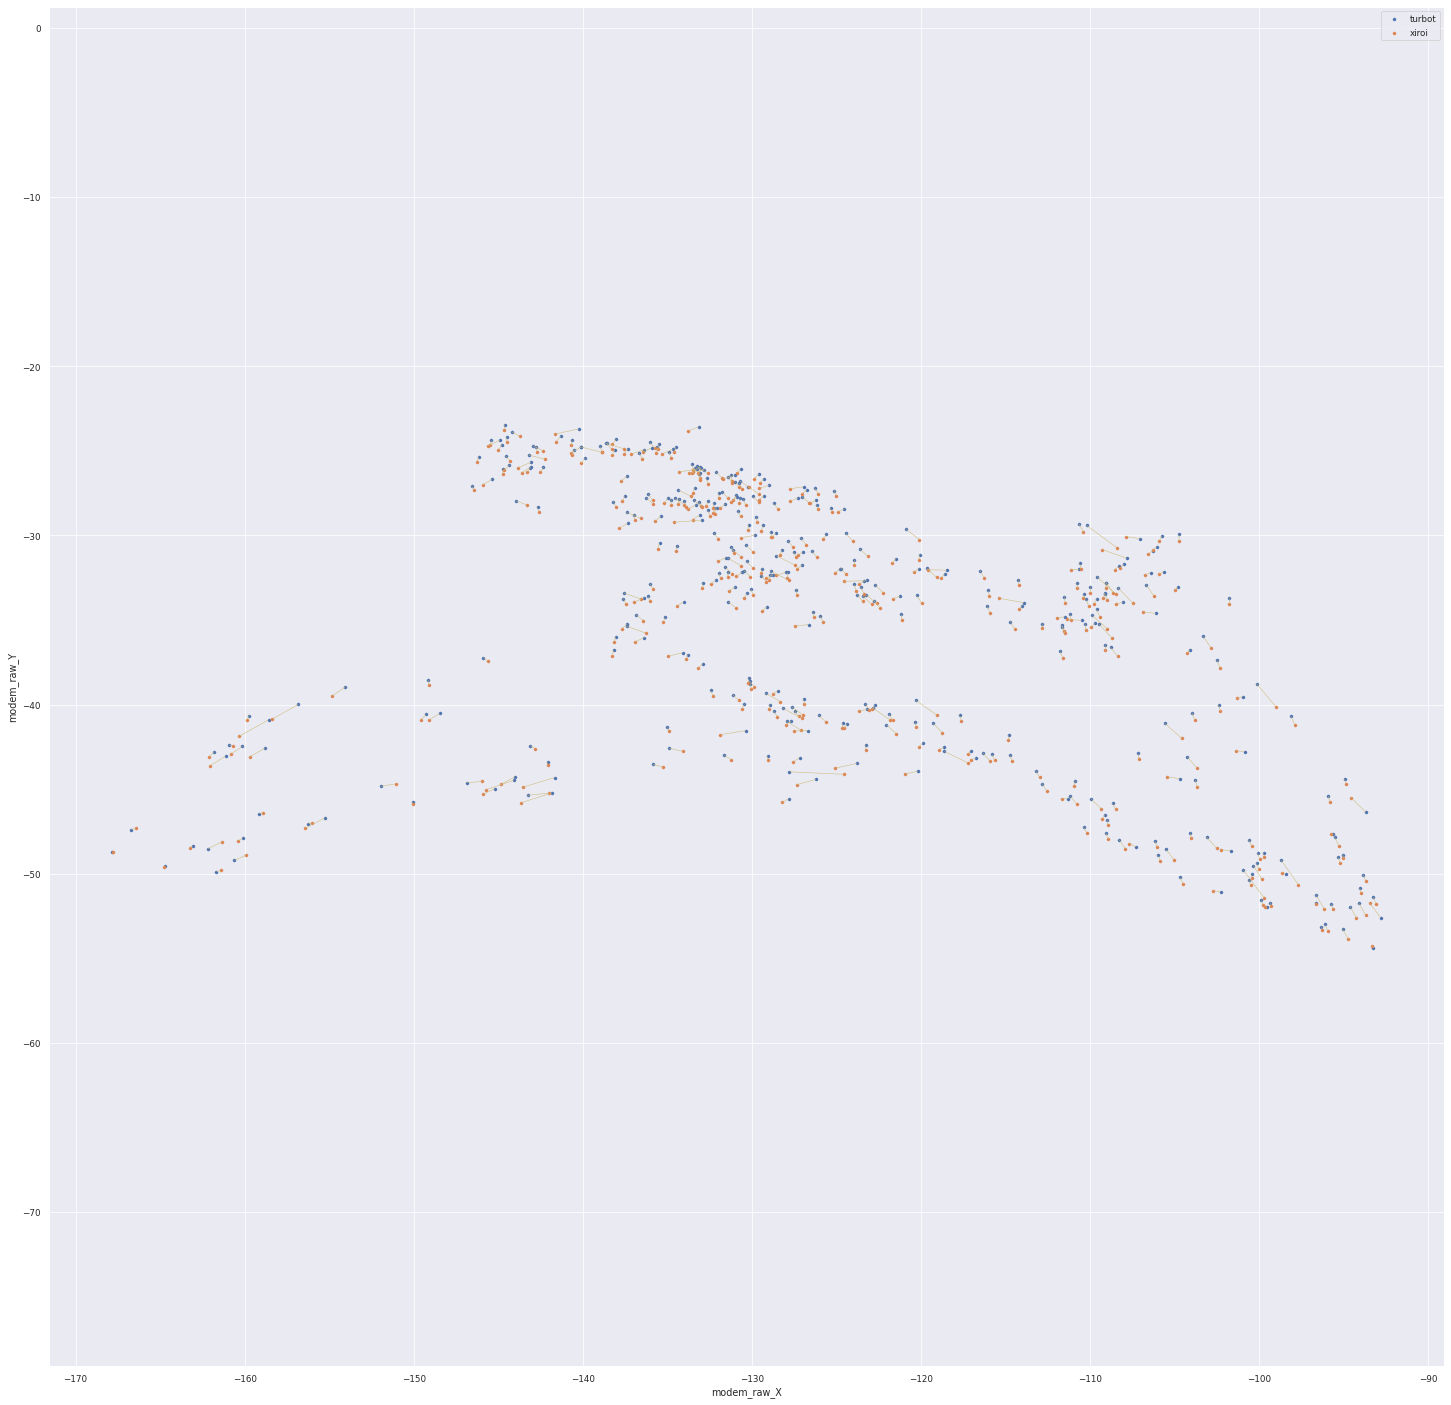

In [25]:
#MODEM RAW I USBLLON COMPOSED correlations

# Plot localization
fig, ax = plt.subplots()
# sns.scatterplot(data=nav,x="nav_status_E_turbotSkip to left side bar

# sns.scatterplot(data=nav,x="nav_status_E_xiroi", y="nav_status_N_xiroi", hue=None, style=None, edgecolor=None, s=10, ax=ax)
#usbllon ned sumat a posicio xiroi
# sns.scatterplot(data=nav,x="usbllong_E_glob", y="usbllong_N_glob", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="modem_delayed_X", y="modem_delayed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="modem_raw_X", y="modem_raw_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
# sns.scatterplot(data=nav,x="usbllong_X_transf", y="usbllong_Y_transf", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="usbllon_sumed_X", y="usbllon_sumed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)

# sns.scatterplot(data=nav,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

plt.legend(["turbot","xiroi","usbllong_NED_composed","modem_raw","usbllong_XY","Usblloncomposed","usbllon_NED"])

for index, row in nav.iterrows():
    plt.plot([row.usbllon_sumed_X, row.modem_raw_X], [row.usbllon_sumed_Y, row.modem_raw_Y], linewidth=0.5, c='y')


plt.axis('equal')
plt.show()

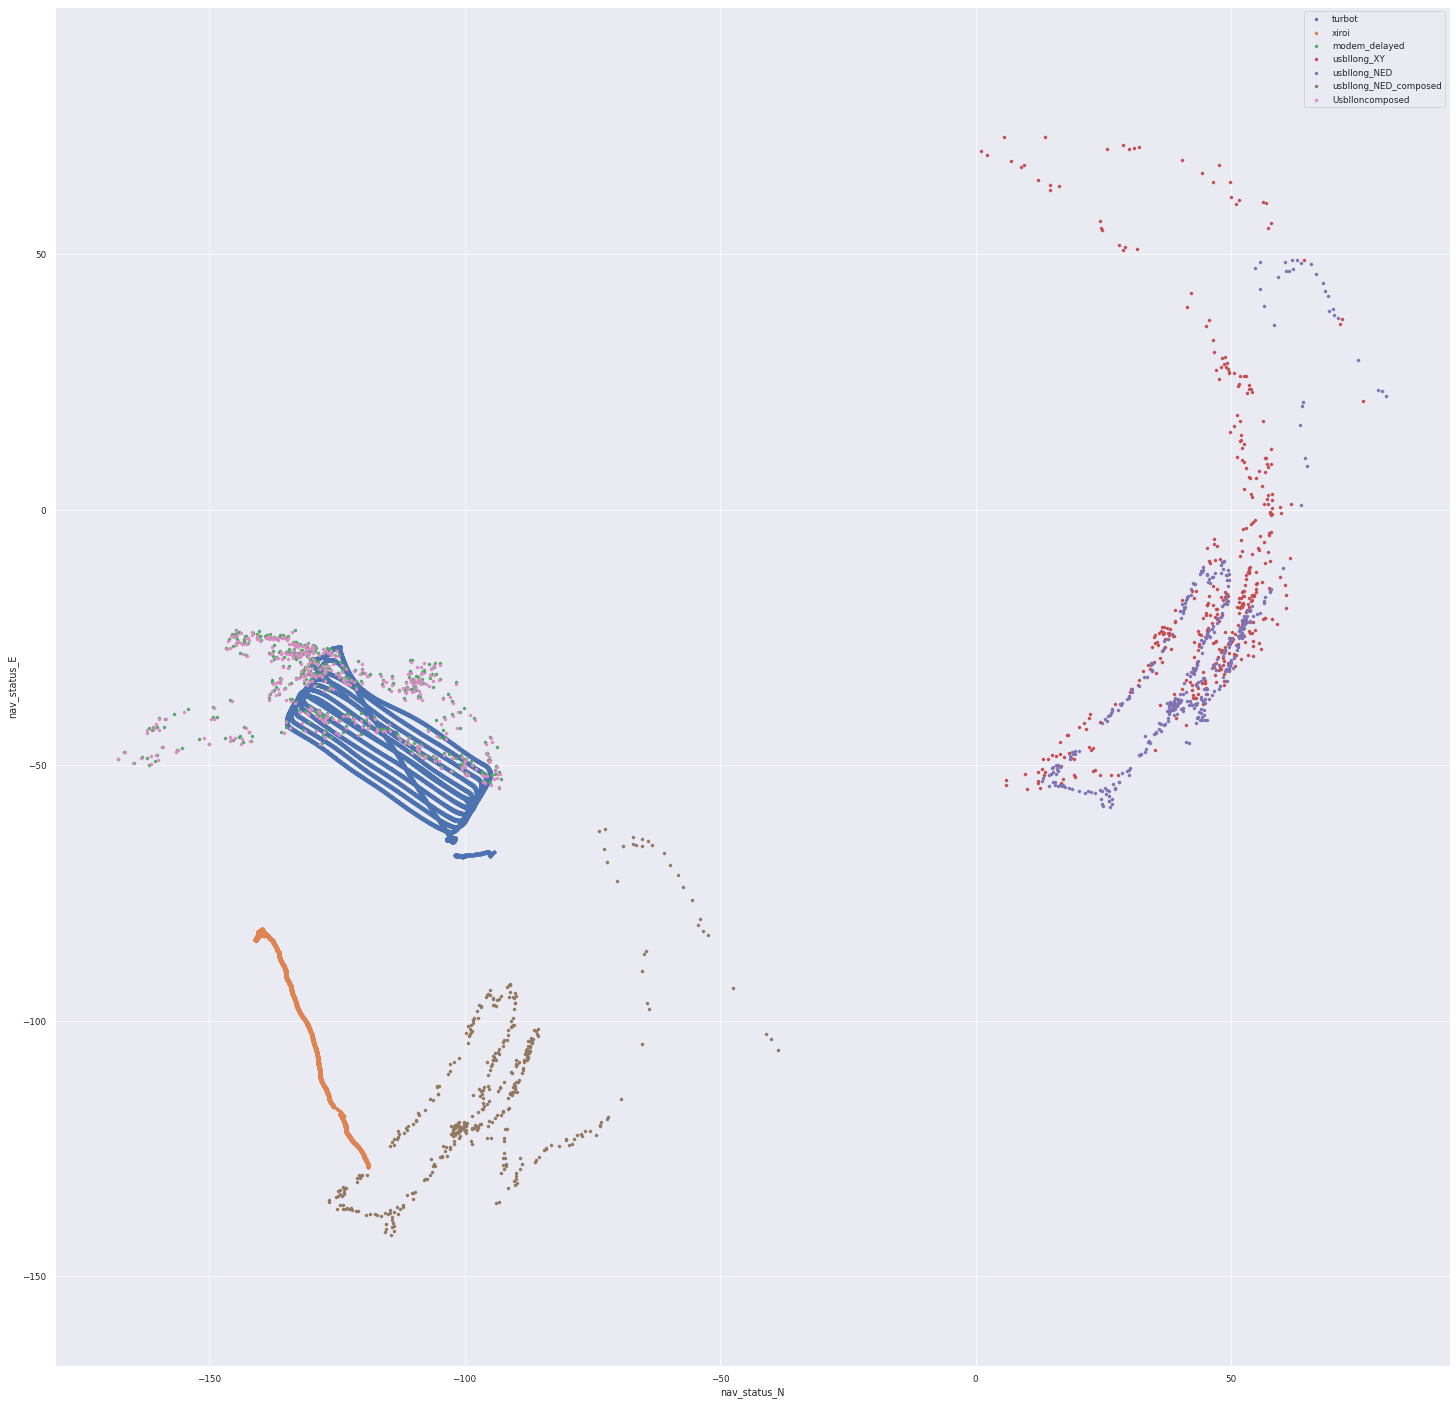

In [26]:
# Plot localization
fig, ax = plt.subplots()
sns.scatterplot(data=turbot_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=xiroi_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

sns.scatterplot(data=nav,x="modem_delayed_X", y="modem_delayed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)

sns.scatterplot(data=nav,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="usbllong_N_glob", y="usbllong_E_glob", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="usbllon_sumed_X", y="usbllon_sumed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)

plt.legend(["turbot","xiroi","modem_delayed","usbllong_XY","usbllong_NED","usbllong_NED_composed","Usblloncomposed"])

plt.axis('equal')
plt.show()